# Movie Recommendation System Using Machine Learning

## Problem 
A Recommender System refers to a system capable of predicting the future preference of a set of items for a user and recommend the top things. For example, a video streaming service will typically rely on a recommender system to propose a personalized list of movies or series to each of its users. Using Python's Surprise library, we as a team aim to develop an end-to-end recommendation system that will predict the rating that the user would give to a movie that he/she has not yet rated. This problem can also be treated as a Regression problem.

## Dataset
Netflix held the Netflix Prize open competition for the best algorithm to predict user ratings for films. The grand prize was $1,000,000 and was won by BellKor's Pragmatic Chaos team. We are going to use the same dataset for this project. The complete dataset is publicly available on Kaggle. The dataset contains 17770 unique movie IDs, 480189 unique user IDs, and ratings on a five-star scale from 1 to 5 (integral). The date of each rating, title, and year of release for each movie id is also provided.

The dataset consists of over 100M rows, however due to computation limitations we decided to use 24M rows, which is still huge.
Link : https://www.kaggle.com/netflix-inc/netflix-prize-data

## Evaluation
- **Mean Absolute Percentage Error** - The mean absolute percentage error (MAPE) is a statistical measure of how accurate a forecast system is. It measures this accuracy as a percentage and can be calculated as the average absolute percent error for each time period minus actual values divided by actual values. Where At is the actual value and Ft is the forecast value.
- **Root Mean Square Error** - It is the standard deviation of the residuals (prediction errors). Residuals measure how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. 

## Expectations
- Build a model that predicts the user's rating to a movie that he/she has not yet rated.
- Minimize the Mean Absolute Percentage Error and Root Mean Square Error.

## Table of Contents
### 1. Environment Setup
### 2. Data Preparation
#### 2.1.  Creating 'MovieRatings.csv'
#### 2.2.  Data Filtering
### 3. Exploratory Data Analysis
### 4. Creating Training and Testing Set
### 5. Similarity Matrix
#### 5.1.  User-Item Similarity Matrix
#### 5.2.  User Item Sparse Matrix
### 6. Recommender Models
#### 6.1.  Recommender Model Using Hybrid Collaborative Filtering
#### 6.2.  Recommender Model Using corrwith() method
#### 6.3.  Recommender Model Using Mean Rating
#### 6.4.  Recommender Model Using Weighted Mean
#### 6.5.  Recommender Systems Using Surprise Library
#### 6.6.  Recommender Systems Using Regression
######  6.6.1.  XGBoost Regression with thirteen features
######  6.6.2.  CatBoost Regression with thirteen features
######  6.6.3.  GradientBoost Regression with thirteen features
######  6.6.4.  AdaBoost Regression with thirteen features
######  6.6.5.  XGBoost Regression with Baseline Only
######  6.6.6.  CatBoost Regression with Baseline Only
######  6.6.7.  GradientBoost Regression with Baseline Only
######  6.6.8.  AdaBoost Regression with Baseline Only
######  6.6.9.  XGBoost with SVD + SVDpp + Baseline Only
######  6.6.10. CatBoost with SVD + SVDpp + Baseline Only
######  6.6.11. GradientBoost with SVD + SVDpp + Baseline Only
######  6.6.12. AdaBoost with SVD + SVDpp + Baseline Only
######  6.6.13. Results with Error Analysis
### 7. Champion Model Fitting-Baseline Only
### 8. Summary of Various Recommender System
#### 8.1. Recommender Model Using Hybrid Collaborative Filtering
#### 8.2. Recommender Model Using corrwith() method
#### 8.3. Recommender Model Using Baseline only

## 1. Environment Setup

In [1]:
# https://github.com/gauravtheP/Netflix-Movie-Recommendation-System
import os
import random
from datetime import datetime

# Data Manipulation libraries
import numpy as np
import pandas as pd
from scipy import sparse

# Data Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
# To create interactive plots
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
%matplotlib inline

import xgboost as xgb
from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor

# scikit-learn
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Surprise libraries
from surprise import Reader, Dataset
from surprise import BaselineOnly
from surprise import SVD
from surprise import SVDpp
from surprise import KNNBasic, KNNWithMeans, KNNWithZScore, KNNBaseline

from surprise.model_selection import GridSearchCV
from surprise.model_selection import cross_validate

import warnings
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

## 2. Data Preparation

### 2.1 Creating 'MovieRatings.csv'

**This .csv file contains over 24M rows**

**Run this cell only once to create the 'MovieRatings.csv' file, comment the cell once operation is complete.**

In [2]:
%%time
# # ============================================================ #
# if not os.path.isfile("Data/MovieRatings.csv"):
#   # This will check if the 'MovieRatings.csv' file is created or not and if not it will create one
#     data = open("Data/MovieRatings.csv", mode = "w") # This creates 'MovieRatings.csv' file
#     # Keeping the file locations of each of the combined_data in a list
#     files = ['Data/combined_data_1.txt']
#     for file in files: # This will access the file paths from the files list
#         print("Reading from file >>> "+str(file))
#         with open(file) as f: # This opens each of the file
#             # This command says that as long as this file is opened, perform the underneath operation.
#             for line in f:
#                 line = line.strip()
#                 if line.endswith(":"):
#                     movieID = line.replace(":", "")
#                 else:
#                     row = [] 
#                     row = [x for x in line.split(",")] #custID, rating and date are separated by comma
#                     row.insert(0, movieID)
#                     data.write(",".join(row))
#                     data.write("\n")
#         print("Completed >>> "+str(file))
#     data.close()
# # ============================================================ #

# # ======================Creating data frame from our output csv file.====================================== #
# startTime = datetime.now()
# df = pd.read_csv("Data/MovieRatings.csv", sep=",", names = ["MovieID","CustID", "Ratings", "Date"])
# df["Date"] = pd.to_datetime(df["Date"])
# df.sort_values(by = "Date", inplace = True)
# # ============================================================ #

# # =======================Creating csv of final dataset===================================== #
# df_titles = pd.read_csv('Data/movie_titles.csv', names = ['MovieID', 'Movie_Year', 'Movie_Name'], encoding = "ISO-8859-1")
# final_df = pd.merge(df, df_titles, on='MovieID')
# final_df.to_csv('Data/final_dataset.csv', index=False)
# # ============================================================ #

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 5.25 µs


In [2]:
df = pd.read_csv('/home/piyush/Desktop/Netflix Data Source/Data/final_dataset.csv')
df.head()

,MovieID,CustID,Ratings,Date,Movie_Year,Movie_Name
0,17064,510180,2,1999-11-11,1984.0,Dune
1,17064,204439,4,1999-12-09,1984.0,Dune
2,17064,731941,4,1999-12-17,1984.0,Dune
3,17064,830363,3,1999-12-21,1984.0,Dune
4,17064,1103054,4,1999-12-21,1984.0,Dune


In [3]:
df.shape

(53825114, 6)

### 2.2 Data Filtering

**Filtering the dataset such that each of the movies have atleast 10,000 ratings and each user has rated atleast 200 movies.**

In [4]:
# Only select movies which has over 10,000 ratings
min_movie_ratings = 10000
filter_movies = (df['Movie_Name'].value_counts() > min_movie_ratings)
filter_movies = filter_movies[filter_movies].index.tolist()

# Only select users who have rated atleast 200 movies
min_user_ratings = 200
filter_users = (df['CustID'].value_counts() > min_user_ratings)
filter_users = filter_users[filter_users].index.tolist()

df = df[(df['Movie_Name'].isin(filter_movies)) & (df['CustID'].isin(filter_users))]
del filter_movies, filter_users, min_movie_ratings, min_user_ratings

df.shape

(24211762, 6)

In [5]:
df.head()

,MovieID,CustID,Ratings,Date,Movie_Year,Movie_Name
0,17064,510180,2,1999-11-11,1984.0,Dune
1,17064,204439,4,1999-12-09,1984.0,Dune
2,17064,731941,4,1999-12-17,1984.0,Dune
3,17064,830363,3,1999-12-21,1984.0,Dune
6,17064,882798,1,1999-12-30,1984.0,Dune


## 3. Exploratory Data Analysis 

In [6]:
# Create a Ratings dataframe which will containg the total number of reviews in each of the movies and the mean rating
ratings_df = pd.DataFrame(df.groupby('Movie_Name')['Ratings'].mean())
ratings_df['Number of ratings'] = pd.DataFrame(df.groupby('Movie_Name')['Ratings'].count())

# Sort the dataframe according to the total number of ratings
ratings_df.sort_values('Number of ratings', ascending=False, inplace=True)
ratings_df.head(10)

,Ratings,Number of ratings
Movie_Name,,
Ocean's Eleven,3.803628,75688
Independence Day,3.666603,68576
The Matrix,4.227543,67385
The Bourne Identity,3.895294,66997
Gladiator,4.143869,66053
Spider-Man,3.844119,65935
Ferris Bueller's Day Off,4.056132,64990
Gone in 60 Seconds,3.513328,64565
Miss Congeniality,3.333281,64054


<AxesSubplot:>

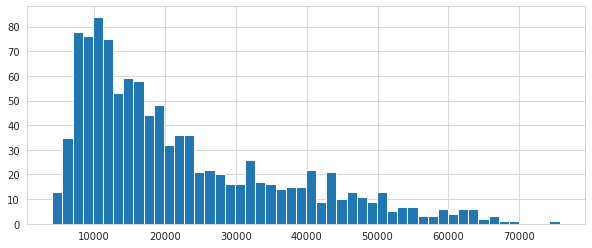

In [7]:
plt.figure(figsize=(10,4))
ratings_df['Number of ratings'].hist(bins=50)

<AxesSubplot:>

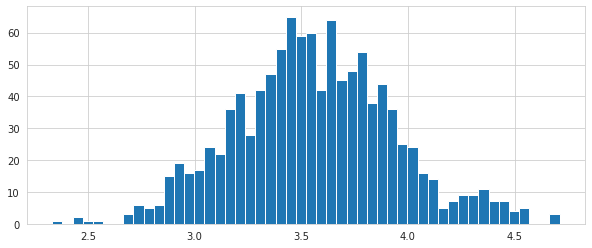

In [8]:
plt.figure(figsize=(10,4))
ratings_df['Ratings'].hist(bins=50)

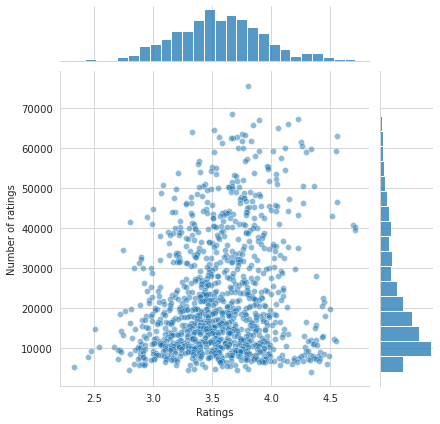

In [9]:
sns.jointplot(x='Ratings',y='Number of ratings',data=ratings_df,alpha=0.5)

In [10]:
warnings.filterwarnings('ignore')

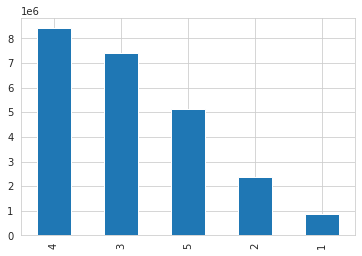

In [11]:
df_eda=df.copy()
df_eda.dropna(inplace=True)
df_eda.dropna(how='all', inplace=True)
df_eda['MovieID'].fillna(-1, inplace=True)
df_eda['CustID'].fillna(-1, inplace=True)
df_eda['Ratings'].fillna(0, inplace=True)
#df['Date'].fillna(0, inplace=True)
df_eda['Movie_Year'].fillna(0, inplace=True)
pe = df_eda['Ratings'].value_counts()
plot = pe.plot.bar()

<AxesSubplot:title={'center':'Movie year X ratings'}, xlabel='Movie_Year', ylabel='Ratings'>

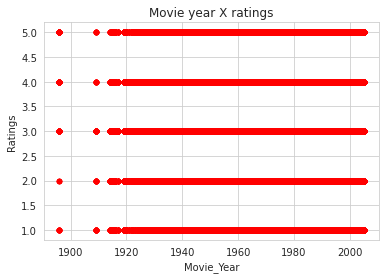

In [13]:
df_eda.plot(x='Movie_Year',y='Ratings',kind='scatter', title='Movie year X ratings',color='r')

In [48]:
#Create a Ratings dataframe which will contain the total number of reviews of the movies given per customer and the mean ratings
ratings_customer_df=pd.DataFrame(df.groupby('CustID')['Ratings'].mean())
ratings_customer_df['Number of ratings given per customer']=pd.DataFrame(df.groupby('CustID')['Ratings'].count())

#Sort the dataframe according to the total number of ratings
ratings_customer_df.sort_values('Number of ratings given per customer',ascending=False,inplace=True)
ratings_customer_df.head(10)

,Ratings,Number of ratings given per customer
CustID,,
387418,2.535398,1130
305344,2.598760,1129
2439493,1.934412,1113
716173,4.505925,1097
2118461,4.306849,1095
1314869,3.371698,1060
1664010,4.897727,1056
2606799,3.549094,1049
2056022,2.944498,1045


<AxesSubplot:>

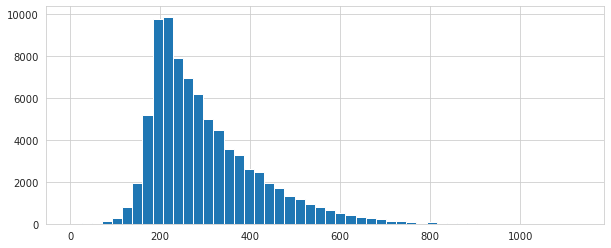

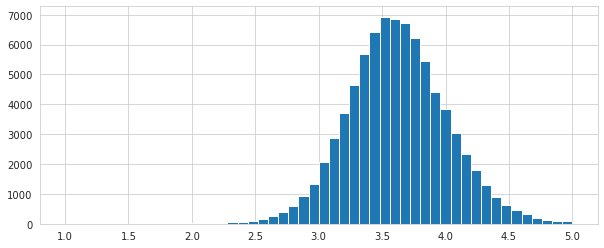

In [49]:
plt.figure(figsize=(10,4))
ratings_customer_df['Number of ratings given per customer'].hist(bins=50)
plt.figure(figsize=(10,4))
ratings_customer_df['Ratings'].hist(bins=50)

## 4. Creating Training and Testing Set

**Splitting the data into Training and Testing set, such that there are 100,000 rows in the Testing Set**

In [12]:
# Shuffle DataFrame
df = df.drop('Movie_Year', axis=1).sample(frac=1).reset_index(drop=True)

# Testingsize
n = 100000

# Split train- & testset
df_train = df[:-n]
df_test = df[-n:]

In [13]:
print('Training Dataset Shape >>> ' + str(df_train.shape))
print('Test Dataset Shape >>> ' + str(df_test.shape))

Training Dataset Shape >>> (24111762, 5)
Test Dataset Shape >>> (100000, 5)


In [14]:
df_titles = pd.read_csv('/home/piyush/Desktop/Netflix Data Source/Data/movie_titles.csv', names = ['MovieID', 'Movie_Year', 'Movie_Name'], encoding = "ISO-8859-1")

## 5. Similarity Matrix

### 5.1 User-Item Similarity Matrix

In [15]:
%%time
# Pivot the table to create a movie matrix in which each row will contain the user id and the ratings which was provided
df_p = df_train.pivot_table(index='CustID', columns='Movie_Name', values='Ratings')
df_p.head()

CPU times: user 22.9 s, sys: 2.24 s, total: 25.2 s
Wall time: 25.3 s


Movie_Name,12 Monkeys,13 Going on 30,24: Season 1,24: Season 2,3000 Miles to Graceland,61*,A Bridge Too Far,A Bronx Tale,A Bug's Life,A Christmas Story,...,Wonderland,Wrong Turn,XXX: Special Edition,XXX: State of the Union,You Can Count on Me,You've Got Mail,Young Guns,Young Guns II,Zoolander,sex
CustID,,,,,,,,,,,,,,,,,,,,,
6,5.0,3.0,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,3.0,NaN
7,NaN,4.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.0,NaN,NaN,4.0,NaN,3.0,2.0,4.0
79,NaN,4.0,NaN,NaN,NaN,4.0,NaN,NaN,4.0,NaN,...,NaN,NaN,3.0,3.0,NaN,4.0,5.0,5.0,4.0,NaN
97,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,3.0
134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,4.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN


In [16]:
df_p.shape

(81214, 1088)

### 5.2 User Item Sparse Matrix

In [19]:
print("<<< USER_ITEM sparse matrix for train Data >>>")
if os.path.isfile("/home/piyush/Desktop/Netflix Data Source/Data/TrainUISparseData.npz"):
    TrainUISparseData = sparse.load_npz("/home/piyush/Desktop/Netflix Data Source/Data/TrainUISparseData.npz")
    print("Shape of Train Sparse matrix = "+str(TrainUISparseData.shape))
    
else:
    TrainUISparseData = sparse.csr_matrix((df_train.Ratings, (df_train.CustID, df_train.MovieID)))
    sparse.save_npz("/home/piyush/Desktop/Netflix Data Source/Data/TrainUISparseData.npz", TrainUISparseData)
    print("Shape of Train Sparse matrix = "+str(TrainUISparseData.shape))
    print("<<< Complete >>>")

<<< USER_ITEM sparse matrix for train Data >>>
Shape of Train Sparse matrix = (2649337, 17765)


In [20]:
print("<<< USER_ITEM sparse matrix for test Data >>>")
if os.path.isfile("/home/piyush/Desktop/Netflix Data Source/Data/TestUISparseData.npz"):
    TestUISparseData = sparse.load_npz("/home/piyush/Desktop/Netflix Data Source/Data/TestUISparseData.npz")
    print("Shape of Test Sparse Matrix = "+str(TestUISparseData.shape))
else:
    TestUISparseData = sparse.csr_matrix((df_test.Ratings, (df_test.CustID, df_test.MovieID)))
    sparse.save_npz("/home/piyush/Desktop/Netflix Data Source/Data/TestUISparseData.npz", TestUISparseData)
    print("Shape of Test Sparse Matrix = "+str(TestUISparseData.shape))
    print("<<< Complete >>>")

<<< USER_ITEM sparse matrix for test Data >>>
Shape of Test Sparse Matrix = (2649309, 17765)


In [21]:
rows_train,cols_train = TrainUISparseData.shape
presentElements_train = TrainUISparseData.count_nonzero()
rows_test,cols_test = TestUISparseData.shape
presentElements_test = TestUISparseData.count_nonzero()
print("Sparsity Of Train matrix : {}% ".format((1-(presentElements_train/(rows_train*cols_train)))*100))
print("Sparsity Of Train matrix : {}% ".format((1-(presentElements_test/(rows_test*cols_test)))*100))

Sparsity Of Train matrix : 99.94876974334838% 
Sparsity Of Train matrix : 99.99978752777132% 


## 6. Recommender Models

### 6.1 Recommender Model Using Hybrid Collaborative Filtering

In [22]:
row_index, col_index = TrainUISparseData.nonzero()
rows_shape = np.unique(row_index)

In [23]:
def getUser_UserSimilarity(sparseMatrix, top = 100):
    startTimestamp20 = datetime.now()  
    
    rowtrain_index, coltrain_index = TrainUISparseData.nonzero()
    rows_shape = np.unique(rowtrain_index)
    
    row_index, col_index = sparseMatrix.nonzero()  #this will give indices of rows in "row_index" and indices of columns in 
    #"col_index" where there is a non-zero value exist.
    rows = np.unique(row_index)
    similarMatrix = np.zeros((rows_shape[:100][99]+1)*100).reshape(rows_shape[:100][99]+1,100)    # 617*100 = 61700. As we are building similarity matrix only 
    #for top 100 most similar users.
    timeTaken = []
    howManyDone = 0
    for row in rows[:top]:
        howManyDone += 1
        startTimestamp = datetime.now().timestamp()  #it will give seconds elapsed
        sim = cosine_similarity(sparseMatrix.getrow(row), sparseMatrix).ravel()
        top100_similar_indices = sim.argsort()[-top:]
        top100_similar = sim[top100_similar_indices]
        similarMatrix[row] = top100_similar
        timeforOne = datetime.now().timestamp() - startTimestamp
        timeTaken.append(timeforOne)
        if howManyDone % 20 == 0:
            print("Time elapsed for {} users = {}sec".format(howManyDone, (datetime.now() - startTimestamp20)))
    print("Average Time taken to compute similarity matrix for 1 user = "+str(sum(timeTaken)/len(timeTaken))+"seconds")
    
    fig = plt.figure(figsize = (12,8))
    plt.plot(timeTaken, label = 'Time Taken For Each User')
    plt.plot(np.cumsum(timeTaken), label='Cumulative Time')
    plt.legend(loc='upper left', fontsize = 15)
    plt.xlabel('Users', fontsize = 20)
    plt.ylabel('Time(Seconds)', fontsize = 20)
    plt.tick_params(labelsize = 15)
    plt.show()
    
    return similarMatrix

Time elapsed for 20 users = 0:00:18.341622sec
Time elapsed for 40 users = 0:00:34.732713sec
Time elapsed for 60 users = 0:00:50.721630sec
Time elapsed for 80 users = 0:01:07.956357sec
Time elapsed for 100 users = 0:01:24.597958sec
Average Time taken to compute similarity matrix for 1 user = 0.8337214684486389seconds


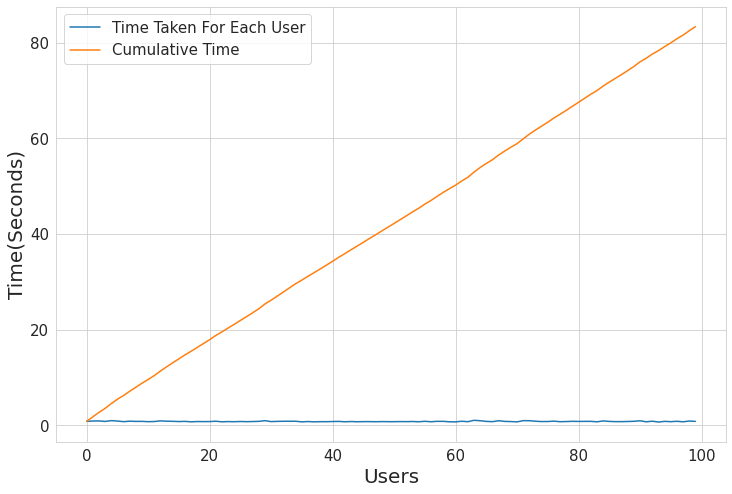

In [24]:
simMatrix = getUser_UserSimilarity(TrainUISparseData, 100)

In [25]:
start = datetime.now()

if not os.path.isfile("/home/piyush/Desktop/Netflix Data Source/Data/m_m_similarity.npz"):
    print("Movie-Movie Similarity file does not exist in your disk. Creating Movie-Movie Similarity Matrix...")  
    m_m_similarity = cosine_similarity(TrainUISparseData.T, dense_output = False)
    print("Done")
    print("Dimension of Matrix = {}".format(m_m_similarity.shape))
    print("Storing the Movie Similarity matrix on disk for further usage")
    sparse.save_npz("/home/piyush/Desktop/Netflix Data Source/Data/m_m_similarity.npz", m_m_similarity)
else:
    print("File exists in the disk. ReLoading the file...")
    value = '/home/piyush/Desktop/Netflix Data Source/Data/m_m_similarity.npz'
    os.remove(value)
    m_m_similarity = cosine_similarity(TrainUISparseData.T, dense_output = False)
    print("Done")
    print("Dimension of Matrix = {}".format(m_m_similarity.shape))
    print("Storing the Movie Similarity matrix on disk for further usage")
    sparse.save_npz("/home/piyush/Desktop/Netflix Data Source/Data/m_m_similarity.npz", m_m_similarity)
    
print(datetime.now() - start)

File exists in the disk. ReLoading the file...
Done
Dimension of Matrix = (17765, 17765)
Storing the Movie Similarity matrix on disk for further usage
0:00:36.005984


In [26]:
movie_ids = np.unique(m_m_similarity.nonzero())
similar_movies_dict = dict()
for movie in movie_ids:
    smlr = np.argsort(-m_m_similarity[movie].toarray().ravel())[1:100]
    similar_movies_dict[movie] = smlr
movie_titles_df = pd.read_csv("/home/piyush/Desktop/Netflix Data Source/Data/movie_titles.csv",sep = ",", header = None, names=['MovieID', 'Year_of_Release', 'Movie_Title'], index_col = "MovieID", encoding = "iso8859_2")

In [27]:
def Simlarity_Movie_Recommedation(movie_name):
    new_movie=movie_titles_df.reset_index().rename(columns={df.index.name:'ID'})
    value = list(new_movie[new_movie['Movie_Title']==movie_name].MovieID[:1]-1)[0]
    movieID_GR = new_movie.MovieID[value]
    print("Name of the movie -------> "+str(movie_titles_df.loc[movieID_GR][1]))
    print("Number of ratings by users for movie {} is {}".format(movie_titles_df.loc[movieID_GR][1], TrainUISparseData[:,movieID_GR].getnnz()))
    print("Number of similar movies to {} is {}".format(movie_titles_df.loc[movieID_GR][1], m_m_similarity[movieID_GR].count_nonzero()))
    all_similar = sorted(m_m_similarity[movieID_GR].toarray().ravel(), reverse = True)[1:]
    similar_100 = all_similar[:101]
    plt.figure(figsize = (10, 8))
    plt.plot(all_similar, label = "All Similar")
    plt.plot(similar_100, label = "Top 100 Similar Movies")
    plt.title("Similar Movies to {}".format(movie_titles_df.loc[movieID_GR][1]), fontsize = 25)
    plt.ylabel("Cosine Similarity Values", fontsize = 20)
    plt.tick_params(labelsize = 15)
    plt.legend(fontsize = 20)
    plt.show()
    return movie_titles_df.loc[similar_movies_dict[movieID_GR][:20]]
    

Name of the movie -------> Top Gun
Number of ratings by users for movie Top Gun is 62995
Number of similar movies to Top Gun is 1135


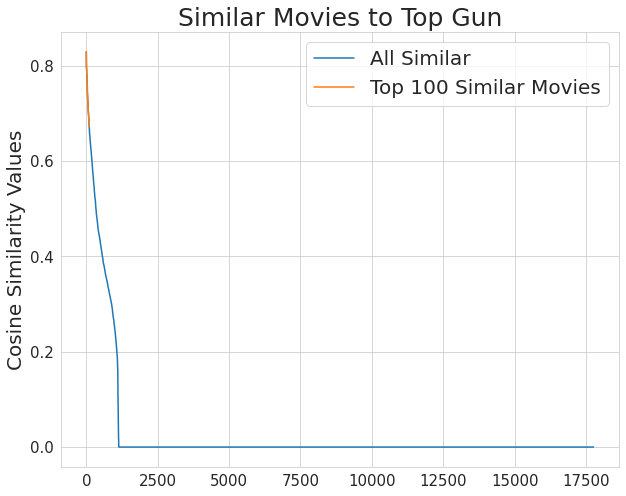

,Year_of_Release,Movie_Title
MovieID,,
15124,1996.0,Independence Day
6287,1990.0,Pretty Woman
15107,2001.0,Ocean's Eleven
13728,2000.0,Gladiator
16879,1997.0,Titanic
6972,1998.0,Armageddon
16668,1992.0,A Few Good Men
6037,2002.0,The Bourne Identity
14410,2002.0,Spider-Man


In [28]:
Simlarity_Movie_Recommedation('Top Gun')

### 6.2 Recommender Model Using corrwith() method

In [29]:
df_train.head()

,MovieID,CustID,Ratings,Date,Movie_Name
0,4849,2096352,4,2005-03-01,Taps
1,14482,1334217,3,2005-04-13,12 Monkeys
2,4833,1441442,5,2005-02-09,Timeline
3,5054,1720746,4,2005-09-05,Mission: Impossible
4,5787,437239,5,2003-07-18,Trading Places


In [31]:
men_user_ratings = df_p['Top Gun']
men_user_ratings.head()

CustID
6      3.0
7      3.0
79     4.0
97     3.0
134    5.0
Name: Top Gun, dtype: float64

In [32]:
similar_to_men = df_p.corrwith(men_user_ratings)
corr_men = pd.DataFrame(similar_to_men,columns=['Correlation'])
corr_men.dropna(inplace=True)
corr_men.sort_values('Correlation',ascending=False,inplace=True)
corr_men.head(10)

,Correlation
Movie_Name,
Top Gun,1.000000
Cocktail,0.476944
Days of Thunder,0.461505
Pretty Woman,0.423554
The Karate Kid Part II,0.413621
A Few Good Men,0.410995
Dirty Dancing,0.385357
Armageddon,0.379572
The Firm,0.376329


In [33]:
def corrwith_movie_recommedation(movie_name):
    men_user_ratings = df_p[movie_name]
    similar_to_men = df_p.corrwith(men_user_ratings)
    corr_men = pd.DataFrame(similar_to_men,columns=['Correlation'])
    corr_men.dropna(inplace=True)
    corr_men.sort_values('Correlation',ascending=False,inplace=True)
    corr_men_results=pd.merge(corr_men,ratings_df,left_on='Movie_Name',right_on='Movie_Name',how='left')
    return corr_men_results.head(10)

### 6.3 Recommender Model Using Mean Rating

In [34]:
# Top n movies
n = 10

# Compute mean for all the movies
mean_rating = df_p.mean(axis=0).sort_values(ascending=False).rename('Mean Rating').to_frame()

# Count the ratings for all the movies
count_ratings = df_p.count(axis=0).rename('Count Rating').to_frame()

# Ranking
ranking = mean_rating.head(n).join(count_ratings)

df_prediction = df_test.set_index('Movie_Name').join(mean_rating)[['Ratings', 'Mean Rating']]
y_true = df_prediction['Ratings']
y_pred = df_prediction['Mean Rating']

# Compute RMSE
rmse_mean = np.sqrt(mean_squared_error(y_true=y_true, y_pred=y_pred))
ranking.reset_index(inplace=True)

In [35]:
mean_rating

,Mean Rating
Movie_Name,
Lord of the Rings: The Return of the King: Extended Edition,4.710705
The Lord of the Rings: The Fellowship of the Ring: Extended Edition,4.705262
Lord of the Rings: The Two Towers: Extended Edition,4.691267
The Shawshank Redemption: Special Edition,4.556716
Star Wars: Episode V: The Empire Strikes Back,4.552717
...,...
Cabin Fever,2.545132
Look Who's Talking Now,2.512882
In the Cut,2.473519


In [36]:
# Create trace
trace = go.Bar(x = ranking['Mean Rating'],
               text = ranking['Movie_Name'].astype(str) +': '+ ranking['Count Rating'].astype(str) + ' Ratings',
               textposition = 'outside',
               textfont = dict(color = '#000000'),
               orientation = 'h',
               y = list(range(1, n+1)),
               marker = dict(color = '#db0000'))

# Create layout
layout = dict(title = 'Ranking Of Top {} Mean-Movie-Ratings: {:.4f} RMSE'.format(n, rmse_mean),
              xaxis = dict(title = 'Mean-Rating',
                          range = (4.3, 4.55)),
              yaxis = dict(title = 'Movie'))

# Create plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

### 6.4 Recommender Model Using Weighted Mean

In [37]:
# number of minimum votes to be considered
m = 1000

# Mean rating of all movies
C = df_p.stack().mean()

# Mean rating of all movies separately
R = df_p.mean(axis=0).values

# Rating count for all movies separately
v = df_p.count().values

# Compute weighted mean
weighted_score = (v/ (v+m) *R) + (m/ (v+m) *C)

# Sort ids to ranking
weighted_ranking = np.argsort(weighted_score)[::-1]
# Sort scores to ranking
weighted_score = np.sort(weighted_score)[::-1]
# Get movie ids
weighted_movie_ids = df_p.columns[weighted_ranking]

# Join labels and predictions
df_prediction = df_test.set_index('Movie_Name').join(pd.DataFrame(weighted_score, index=weighted_movie_ids, columns=['Prediction']))[['Ratings', 'Prediction']]
y_true = df_prediction['Ratings']
y_pred = df_prediction['Prediction']

# Compute RMSE
rmse_weighted = np.sqrt(mean_squared_error(y_true=y_true, y_pred=y_pred))

In [38]:
# Create DataFrame for plotting
df_plot = pd.DataFrame(weighted_score[:n], columns=['Ratings'])
df_plot.index = weighted_movie_ids[:10]
ranking_weighted_rating = df_plot.join(count_ratings)
del df_plot
ranking_weighted_rating.reset_index(inplace=True)
# Create trace
trace = go.Bar(x = ranking_weighted_rating['Ratings'],
               text = ranking_weighted_rating['Movie_Name'].astype(str) +': '+ ranking_weighted_rating['Count Rating'].astype(str) + ' Ratings',
               textposition = 'outside',
               textfont = dict(color = '#000000'),
               orientation = 'h',
               y = list(range(1, n+1)),
               marker = dict(color = '#db0000'))
# Create layout
layout = dict(title = 'Ranking Of Top {} Weighted-Movie-Ratings: {:.4f} RMSE'.format(n, rmse_weighted),
              xaxis = dict(title = 'Weighted Rating',
                          range = (4.15, 4.6)),
              yaxis = dict(title = 'Movie'))
# Create plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)


### 6.5 Recommender Systems Using Surprise Library

In [27]:
%%time
data = Dataset.load_from_df(df[['CustID', 'MovieID', 'Ratings']].sample(100000), Reader())

# Storing the algorithms in a dictionary
algorithms = {'SVD': SVD(), 
              'SVDpp':SVDpp(), 
              'KNNBaseline':KNNBaseline(), 
              'BaselineOnly':BaselineOnly(),
              'KNNBasic': KNNBasic(),
              'KNNWithMeans': KNNWithMeans(),
              'KNNWithZScore': KNNWithZScore()
             }

results = []

# Using iteration to loop through the algorithms
for name, algo in algorithms.items():
    comp = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
    mean_res = pd.DataFrame.from_dict(comp).mean(axis=0)
    mean_res = mean_res.append(pd.Series([str(algo).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    results.append(mean_res)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9691  0.9724  0.9710  0.9653  0.9731  0.9702  0.0028  
MAE (testset)     0.7781  0.7768  0.7746  0.7725  0.7772  0.7758  0.0020  
Fit time          4.47    4.44    4.37    4.22    5.00    4.50    0.26    
Test time         0.11    0.11    0.12    0.11    0.15    0.12    0.02    
Evaluating RMSE, MAE of algorithm SVDpp on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9671  0.9699  0.9684  0.9698  0.9668  0.9684  0.0013  
MAE (testset)     0.7715  0.7734  0.7726  0.7725  0.7725  0.7725  0.0006  
Fit time          11.00   11.40   11.61   12.08   11.28   11.47   0.36    
Test time         0.32    0.32    0.47    0.30    0.42    0.36    0.07    
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Compu

In [28]:
surprise_results = pd.DataFrame(results).set_index('Algorithm').sort_values('test_rmse', ascending=True)
surprise_results.reset_index(inplace=True)
surprise_results

,Algorithm,test_rmse,test_mae,fit_time,test_time
0,BaselineOnly,0.963734,0.775090,0.308218,0.128919
1,SVDpp,0.968410,0.772491,11.473823,0.364891
2,SVD,0.970163,0.775841,4.498742,0.121870
3,KNNBaseline,1.052770,0.833388,18.031848,4.155087
4,KNNBasic,1.094865,0.866559,13.535003,3.764555
5,KNNWithMeans,1.101009,0.858281,14.224500,3.706781
6,KNNWithZScore,1.115780,0.867953,12.997724,4.002331


### 6.6 Recommender Systems Using Regression

In [29]:
def getAverageRatings(sparseMatrix, if_user):
    ax = 1 if if_user else 0
    #axis = 1 means rows and axis = 0 means columns 
    sumOfRatings = sparseMatrix.sum(axis = ax).A1  #this will give an array of sum of all the ratings of user if axis = 1 else 
    #sum of all the ratings of movies if axis = 0
    noOfRatings = (sparseMatrix!=0).sum(axis = ax).A1  #this will give a boolean True or False array, and True means 1 and False 
    #means 0, and further we are summing it to get the count of all the non-zero cells means length of non-zero cells
    rows, cols = sparseMatrix.shape
    averageRatings = {i: sumOfRatings[i]/noOfRatings[i] for i in range(rows if if_user else cols) if noOfRatings[i]!=0}
    return averageRatings

In [30]:
Global_Average_Rating = TrainUISparseData.sum()/TrainUISparseData.count_nonzero()
print("Global Average Rating {}".format(Global_Average_Rating))

AvgRatingUser = getAverageRatings(TrainUISparseData, True)
print("Average rating of user 769 = {}".format(AvgRatingUser[769]))

AvgRatingMovie = getAverageRatings(TrainUISparseData, False)
print("Average rating of movie 331 = {}".format(AvgRatingMovie[187]))

Global Average Rating 3.522156294260053
Average rating of user 769 = 3.140625
Average rating of movie 331 = 2.9179860219654827


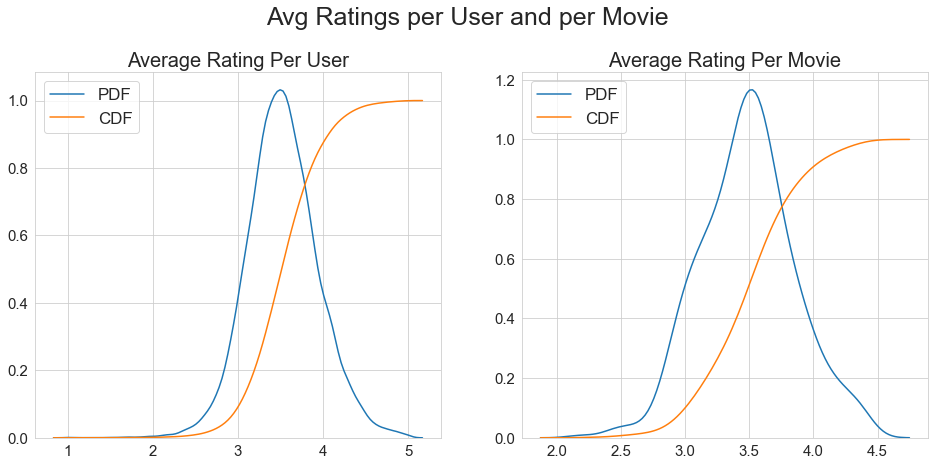

In [31]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (16, 7))
fig.suptitle('Avg Ratings per User and per Movie', fontsize=25)

user_average = [rats for rats in AvgRatingUser.values()]
sns.distplot(user_average, hist = False, ax = axes[0], label = "PDF")
sns.kdeplot(user_average, cumulative = True, ax = axes[0], label = "CDF")
axes[0].set_title("Average Rating Per User", fontsize=20)
axes[0].tick_params(labelsize = 15)
axes[0].legend(loc='upper left', fontsize = 17)

movie_average = [ratm for ratm in AvgRatingMovie.values()]
sns.distplot(movie_average, hist = False, ax = axes[1], label = "PDF")
sns.kdeplot(movie_average, cumulative = True, ax = axes[1], label = "CDF")
axes[1].set_title("Average Rating Per Movie", fontsize=20)
axes[1].tick_params(labelsize = 15)
axes[1].legend(loc='upper left', fontsize = 17)

plt.subplots_adjust(wspace=0.2, top=0.85)
plt.show()

In [32]:
total_users = len(np.unique(df["CustID"]))
train_users = len(AvgRatingUser)
uncommonUsers = total_users - train_users
                  
print("Total number of Users = {}".format(total_users))
print("Number of Users in train data= {}".format(train_users))
print("Number of Users not present in train data = {}({}%)".format(uncommonUsers, np.round((uncommonUsers/total_users)*100), 2))

Total number of Users = 20828
Number of Users in train data= 20828
Number of Users not present in train data = 0(0.0%)


In [33]:
row_index, col_index = TrainUISparseData.nonzero()
rows = np.unique(row_index)

In [34]:
train_sample_sparse = TrainUISparseData

In [35]:
def get_sample_sparse_matrix(sparseMatrix, n_users, n_movies):
    startTime = datetime.now()
    users, movies, ratings = sparse.find(sparseMatrix)
    uniq_users = np.unique(users)
    uniq_movies = np.unique(movies)
    np.random.seed(15)   #this will give same random number everytime, without replacement
    userS = np.random.choice(uniq_users, n_users, replace = False)
    movieS = np.random.choice(uniq_movies, n_movies, replace = False)
    mask = np.logical_and(np.isin(users, userS), np.isin(movies, movieS))
    sparse_sample = sparse.csr_matrix((ratings[mask], (users[mask], movies[mask])), 
                                                     shape = (max(userS)+1, max(movieS)+1))
    print("Sparse Matrix creation done. Saving it for later use.")
    sparse.save_npz(path, sparse_sample)
    print("Done")
    print("Shape of Sparse Sampled Matrix = "+str(sparse_sample.shape))
    
    print(datetime.now() - startTime)
    return sparse_sample

path = "Data/TrainUISparseData_Sample.npz"
if not os.path.isfile(path):
    train_sample_sparse = get_sample_sparse_matrix(TrainUISparseData, 500, 80)
else:
    train_sample_sparse = sparse.load_npz(path)
    print("Shape of Train Sample Sparse Matrix = "+str(train_sample_sparse.shape))

Shape of Train Sample Sparse Matrix = (2639773, 4491)


In [36]:
path = "Data/TestUISparseData_Sample.npz"
if not os.path.isfile(path):
    test_sample_sparse = get_sample_sparse_matrix(TestUISparseData, 500, 80)
else:
    test_sample_sparse = sparse.load_npz(path)
    print("Shape of Test Sample Sparse Matrix = "+str(test_sample_sparse.shape))

Shape of Test Sample Sparse Matrix = (2648735, 4489)


In [37]:
globalAvgMovies = getAverageRatings(train_sample_sparse, False)
globalAvgUsers = getAverageRatings(train_sample_sparse, True)

In [38]:
sample_train_users, sample_train_movies, sample_train_ratings = sparse.find(train_sample_sparse)

In [39]:
if os.path.isfile("Data/Train_Regression.csv"):
    print("File is already present in your disk. You do not have to prepare it again.")
else:
    startTime = datetime.now()
    print("Preparing Train csv file for {} rows".format(len(sample_train_ratings)))
    with open("Data/Train_Regression.csv", mode = "w") as data:
        count = 0
        for user, movie, rating in zip(sample_train_users, sample_train_movies, sample_train_ratings):
            row = list()
            row.append(user)  #appending user ID
            row.append(movie) #appending movie ID
            row.append(train_sample_sparse.sum()/train_sample_sparse.count_nonzero()) #appending global average rating

#----------------------------------Ratings given to "movie" by top 5 similar users with "user"--------------------#
            similar_users = cosine_similarity(train_sample_sparse[user], train_sample_sparse).ravel()
            similar_users_indices = np.argsort(-similar_users)[1:]
            similar_users_ratings = train_sample_sparse[similar_users_indices, movie].toarray().ravel()
            top_similar_user_ratings = list(similar_users_ratings[similar_users_ratings != 0][:5])
            top_similar_user_ratings.extend([globalAvgMovies[movie]]*(5-len(top_similar_user_ratings)))
            #above line means that if top 5 ratings are not available then rest of the ratings will be filled by "movie" average
            #rating. Let say only 3 out of 5 ratings are available then rest 2 will be "movie" average rating.
            row.extend(top_similar_user_ratings)
            
 #----------------------------------Ratings given by "user" to top 5 similar movies with "movie"------------------#
            similar_movies = cosine_similarity(train_sample_sparse[:,movie].T, train_sample_sparse.T).ravel()
            similar_movies_indices = np.argsort(-similar_movies)[1:]
            similar_movies_ratings = train_sample_sparse[user, similar_movies_indices].toarray().ravel()
            top_similar_movie_ratings = list(similar_movies_ratings[similar_movies_ratings != 0][:5])
            top_similar_movie_ratings.extend([globalAvgUsers[user]]*(5-len(top_similar_movie_ratings)))
            #above line means that if top 5 ratings are not available then rest of the ratings will be filled by "user" average
            #rating. Let say only 3 out of 5 ratings are available then rest 2 will be "user" average rating.
            row.extend(top_similar_movie_ratings)
            
 #----------------------------------Appending "user" average, "movie" average & rating of "user""movie"-----------#
            row.append(globalAvgUsers[user])
            row.append(globalAvgMovies[movie])
            row.append(rating)
            
#-----------------------------------Converting rows and appending them as comma separated values to csv file------#
            data.write(",".join(map(str, row)))
            data.write("\n")
    
            count += 1
            if count % 2000 == 0:
                print("Done for {}. Time elapsed: {}".format(count, (datetime.now() - startTime)))
                
    print("Total Time for {} rows = {}".format(len(sample_train_ratings), (datetime.now() - startTime)))

File is already present in your disk. You do not have to prepare it again.


In [40]:
Train_Reg = pd.read_csv("Data/Train_Regression.csv", names = ["User_ID", "Movie_ID", "Global_Average", "SUR1", "SUR2", "SUR3", "SUR4", "SUR5", "SMR1", "SMR2", "SMR3", "SMR4", "SMR5", "User_Average", "Movie_Average", "Rating"])
Train_Reg.head()

,User_ID,Movie_ID,Global_Average,SUR1,SUR2,SUR3,SUR4,SUR5,SMR1,SMR2,SMR3,SMR4,SMR5,User_Average,Movie_Average,Rating
0,4421,30,3.560022,3,3,5.0,2.0,2.0,5,4,4,4,3,3.575758,3.617251,3
1,8748,30,3.560022,5,5,4.0,4.0,4.0,5,3,4,4,4,3.758621,3.617251,3
2,12253,30,3.560022,4,4,3.0,4.0,3.0,5,5,4,4,5,4.178571,3.617251,3
3,16479,30,3.560022,4,3,3.0,3.0,5.0,5,4,3,2,3,3.633333,3.617251,4
4,32754,30,3.560022,4,5,4.0,5.0,5.0,1,3,4,5,4,3.500000,3.617251,5


In [41]:
print("Number of nan Values = "+str(Train_Reg.isnull().sum().sum()))
print("Shape of Train DataFrame = {}".format(Train_Reg.shape))

Number of nan Values = 0
Shape of Train DataFrame = (14778, 16)


In [42]:
sample_test_users, sample_test_movies, sample_test_ratings = sparse.find(test_sample_sparse)

In [43]:
if os.path.isfile("Data/Test_Regression.csv"):
    print("File is already present in your disk. You do not have to prepare it again.")
else:
    startTime = datetime.now()
    print("Preparing Test csv file for {} rows".format(len(sample_test_ratings)))
    with open("Data/Test_Regression.csv", mode = "w") as data:
        count = 0
        for user, movie, rating in zip(sample_test_users, sample_test_movies, sample_test_ratings):
            row = list()
            row.append(user)  #appending user ID
            row.append(movie) #appending movie ID
            row.append(train_sample_sparse.sum()/train_sample_sparse.count_nonzero()) #appending global average rating

#-----------------------------Ratings given to "movie" by top 5 similar users with "user"-------------------------#
            try:
                similar_users = cosine_similarity(train_sample_sparse[user], train_sample_sparse).ravel()
                similar_users_indices = np.argsort(-similar_users)[1:]
                similar_users_ratings = train_sample_sparse[similar_users_indices, movie].toarray().ravel()
                top_similar_user_ratings = list(similar_users_ratings[similar_users_ratings != 0][:5])
                top_similar_user_ratings.extend([globalAvgMovies[movie]]*(5-len(top_similar_user_ratings)))
                #above line means that if top 5 ratings are not available then rest of the ratings will be filled by "movie" 
                #average rating. Let say only 3 out of 5 ratings are available then rest 2 will be "movie" average rating.
                row.extend(top_similar_user_ratings)
            #########Cold Start Problem, for a new user or a new movie#########    
            except(IndexError, KeyError):
                global_average_train_rating = [train_sample_sparse.sum()/train_sample_sparse.count_nonzero()]*5
                row.extend(global_average_train_rating)
            except:
                raise
                
 #-----------------------------Ratings given by "user" to top 5 similar movies with "movie"-----------------------#
            try:
                similar_movies = cosine_similarity(train_sample_sparse[:,movie].T, train_sample_sparse.T).ravel()
                similar_movies_indices = np.argsort(-similar_movies)[1:]
                similar_movies_ratings = train_sample_sparse[user, similar_movies_indices].toarray().ravel()
                top_similar_movie_ratings = list(similar_movies_ratings[similar_movies_ratings != 0][:5])
                top_similar_movie_ratings.extend([globalAvgUsers[user]]*(5-len(top_similar_movie_ratings)))
                #above line means that if top 5 ratings are not available then rest of the ratings will be filled by "user" 
                #average rating. Let say only 3 out of 5 ratings are available then rest 2 will be "user" average rating.
                row.extend(top_similar_movie_ratings)
            #########Cold Start Problem, for a new user or a new movie#########
            except(IndexError, KeyError):
                global_average_train_rating = [train_sample_sparse.sum()/train_sample_sparse.count_nonzero()]*5
                row.extend(global_average_train_rating)
            except:
                raise
                
 #-----------------------------Appending "user" average, "movie" average & rating of "user""movie"----------------#
            try:        
                row.append(globalAvgUsers[user])
            except (KeyError):
                global_average_train_rating = train_sample_sparse.sum()/train_sample_sparse.count_nonzero()
                row.append(global_average_train_rating)
            except:
                raise
                
            try:
                row.append(globalAvgMovies[movie])
            except(KeyError):
                global_average_train_rating = train_sample_sparse.sum()/train_sample_sparse.count_nonzero()
                row.append(global_average_train_rating)
            except:
                raise
                
            row.append(rating)
            
#------------------------------Converting rows and appending them as comma separated values to csv file-----------#
            data.write(",".join(map(str, row)))
            data.write("\n")
    
            count += 1
            if count % 100 == 0:
                print("Done for {}. Time elapsed: {}".format(count, (datetime.now() - startTime)))
                
    print("Total Time for {} rows = {}".format(len(sample_test_ratings), (datetime.now() - startTime)))

File is already present in your disk. You do not have to prepare it again.


In [44]:
Test_Reg = pd.read_csv("Data/Test_Regression.csv", names = ["User_ID", "Movie_ID", "Global_Average", "SUR1", "SUR2", "SUR3", "SUR4", "SUR5", "SMR1", "SMR2", "SMR3", "SMR4", "SMR5", "User_Average", "Movie_Average", "Rating"])
Test_Reg.head()

,User_ID,Movie_ID,Global_Average,SUR1,SUR2,SUR3,SUR4,SUR5,SMR1,SMR2,SMR3,SMR4,SMR5,User_Average,Movie_Average,Rating
0,687573,83,3.560022,3.560022,3.560022,3.560022,3.560022,3.560022,3.560022,3.560022,3.560022,3.560022,3.560022,3.560022,3.560022,3
1,727242,83,3.560022,3.560022,3.560022,3.560022,3.560022,3.560022,3.560022,3.560022,3.560022,3.560022,3.560022,3.560022,3.560022,1
2,967163,83,3.560022,3.560022,3.560022,3.560022,3.560022,3.560022,3.560022,3.560022,3.560022,3.560022,3.560022,3.560022,3.560022,4
3,1199475,83,3.560022,3.560022,3.560022,3.560022,3.560022,3.560022,3.560022,3.560022,3.560022,3.560022,3.560022,3.560022,3.560022,3
4,1396046,83,3.560022,3.560022,3.560022,3.560022,3.560022,3.560022,3.560022,3.560022,3.560022,3.560022,3.560022,3.560022,3.560022,3


In [45]:
print("Number of nan Values = "+str(Test_Reg.isnull().sum().sum()))
print("Shape of Test DataFrame = {}".format(Test_Reg.shape))

Number of nan Values = 0
Shape of Test DataFrame = (366, 16)


In [46]:
Train_Reg[['User_ID', 'Movie_ID', 'Rating']].head(5)

,User_ID,Movie_ID,Rating
0,4421,30,3
1,8748,30,3
2,12253,30,3
3,16479,30,4
4,32754,30,5


In [47]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(Train_Reg[['User_ID', 'Movie_ID', 'Rating']], reader)
trainset = data.build_full_trainset()
testset = list(zip(Test_Reg["User_ID"].values, Test_Reg["Movie_ID"].values, Test_Reg["Rating"].values))

In [48]:
error_table = pd.DataFrame(columns = ["Model", "Train RMSE", "Train MAPE", "Test RMSE", "Test MAPE"])
model_train_evaluation = dict()
model_test_evaluation = dict()

In [49]:
def make_table(model_name, rmse_train, mape_train, rmse_test, mape_test):
    global error_table
    error_table = error_table.append(pd.DataFrame([[model_name, rmse_train, mape_train, rmse_test, mape_test]], columns = ["Model", "Train RMSE", "Train MAPE", "Test RMSE", "Test MAPE"]))
    error_table.reset_index(drop = True, inplace = True)

def error_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(abs((y_true - y_pred)/y_true))*100
    return rmse, mape

def plot_importance(model, clf):
    fig = plt.figure(figsize = (8, 6))
    ax = fig.add_axes([0,0,1,1])
    model.plot_importance(clf, ax = ax, height = 0.3)
    plt.xlabel("F Score", fontsize = 20)
    plt.ylabel("Features", fontsize = 20)
    plt.title("Feature Importance", fontsize = 20)
    plt.tick_params(labelsize = 15)
    
    plt.show()

def get_ratings(predictions):
    actual = np.array([pred.r_ui for pred in predictions])
    predicted = np.array([pred.est for pred in predictions])
    return actual, predicted
#in surprise prediction of every data point is returned as dictionary like this:
#"user: 196        item: 302        r_ui = 4.00   est = 4.06   {'actual_k': 40, 'was_impossible': False}"
#In this dictionary, "r_ui" is a key for actual rating and "est" is a key for predicted rating


def get_error(predictions):
    actual, predicted = get_ratings(predictions)
    rmse = np.sqrt(mean_squared_error(actual, predicted)) 
    mape = np.mean(abs((actual - predicted)/actual))*100
    return rmse, mape

my_seed = 15
random.seed(my_seed)
np.random.seed(my_seed)

def run_surprise(algo, trainset, testset, model_name):
    startTime = datetime.now()
    
    train = dict()
    test = dict()
    
    algo.fit(trainset)
    #You can check out above function at "https://surprise.readthedocs.io/en/stable/getting_started.html" in 
    #"Train-test split and the fit() method" section
    
#-----------------Evaluating Train Data------------------#
    print("-"*50)
    print("TRAIN DATA")
    train_pred = algo.test(trainset.build_testset())
    #You can check out "algo.test()" function at "https://surprise.readthedocs.io/en/stable/getting_started.html" in 
    #"Train-test split and the fit() method" section
    #You can check out "trainset.build_testset()" function at "https://surprise.readthedocs.io/en/stable/FAQ.html#can-i-use-my-own-dataset-with-surprise-and-can-it-be-a-pandas-dataframe" in 
    #"How to get accuracy measures on the training set" section
    train_actual, train_predicted = get_ratings(train_pred)
    train_rmse, train_mape = get_error(train_pred)
    print("RMSE = {}".format(train_rmse))
    print("MAPE = {}".format(train_mape))
    print("-"*50)
    train = {"RMSE": train_rmse, "MAPE": train_mape, "Prediction": train_predicted}
    
#-----------------Evaluating Test Data------------------#
    print("TEST DATA")
    test_pred = algo.test(testset)
    #You can check out "algo.test()" function at "https://surprise.readthedocs.io/en/stable/getting_started.html" in 
    #"Train-test split and the fit() method" section
    test_actual, test_predicted = get_ratings(test_pred)
    test_rmse, test_mape = get_error(test_pred)
    print("RMSE = {}".format(test_rmse))
    print("MAPE = {}".format(test_mape))
    print("-"*50)
    test = {"RMSE": test_rmse, "MAPE": test_mape, "Prediction": test_predicted}
    
    print("Time Taken = "+str(datetime.now() - startTime))
    
    make_table(model_name, train_rmse, train_mape, test_rmse, test_mape)
    
    return train, test

x_train = Train_Reg.drop(["User_ID", "Movie_ID", "Rating"], axis = 1)
x_test = Test_Reg.drop(["User_ID", "Movie_ID", "Rating"], axis = 1)
y_train = Train_Reg["Rating"]
y_test = Test_Reg["Rating"]

### XGBoost Regression with thirteen features

In [50]:
def train_test_xgboost(x_train, x_test, y_train, y_test, model_name):
    startTime = datetime.now()
    train_result = dict()
    test_result = dict()
    
    clf = xgb.XGBRegressor();
    clf.fit(x_train, y_train)
    
    print("-"*50)
    print("TRAIN DATA")
    y_pred_train = clf.predict(x_train)
    rmse_train, mape_train = error_metrics(y_train, y_pred_train)
    print("RMSE = {}".format(rmse_train))
    print("MAPE = {}".format(mape_train))
    print("-"*50)
    train_result = {"RMSE": rmse_train, "MAPE": mape_train, "Prediction": y_pred_train}
    
    print("TEST DATA")
    y_pred_test = clf.predict(x_test)
    rmse_test, mape_test = error_metrics(y_test, y_pred_test)
    print("RMSE = {}".format(rmse_test))
    print("MAPE = {}".format(mape_test))
    print("-"*50)
    test_result = {"RMSE": rmse_test, "MAPE": mape_test, "Prediction": y_pred_test}
        
    print("Time Taken = "+str(datetime.now() - startTime))
    
    #plot_importance(xgb, clf)
    
    make_table(model_name, rmse_train, mape_train, rmse_test, mape_test)
    
    return train_result, test_result

train_result, test_result = train_test_xgboost(x_train, x_test, y_train, y_test, "XGBoost Regression")

model_train_evaluation["XGBoost Regression"] = train_result
model_test_evaluation["XGBoost Regression"] = test_result

--------------------------------------------------
TRAIN DATA
RMSE = 0.6200624621181768
MAPE = 17.062030732631683
--------------------------------------------------
TEST DATA
RMSE = 1.1205111302695034
MAPE = 39.88913209169074
--------------------------------------------------
Time Taken = 0:00:00.917512


### CatBoost Regression with thirteen features

In [51]:
def train_test_catboost(x_train, x_test, y_train, y_test, model_name):
    startTime = datetime.now()
    train_result = dict()
    test_result = dict()
    
    clf = CatBoostRegressor();
    clf.fit(x_train, y_train)
    
    print("-"*50)
    print("TRAIN DATA")
    y_pred_train = clf.predict(x_train)
    rmse_train, mape_train = error_metrics(y_train, y_pred_train)
    print("RMSE = {}".format(rmse_train))
    print("MAPE = {}".format(mape_train))
    print("-"*50)
    train_result = {"RMSE": rmse_train, "MAPE": mape_train, "Prediction": y_pred_train}
    
    print("TEST DATA")
    y_pred_test = clf.predict(x_test)
    rmse_test, mape_test = error_metrics(y_test, y_pred_test)
    print("RMSE = {}".format(rmse_test))
    print("MAPE = {}".format(mape_test))
    print("-"*50)
    test_result = {"RMSE": rmse_test, "MAPE": mape_test, "Prediction": y_pred_test}
        
    print("Time Taken = "+str(datetime.now() - startTime))
        
    make_table(model_name, rmse_train, mape_train, rmse_test, mape_test)
    
    return train_result, test_result

train_result, test_result = train_test_catboost(x_train, x_test, y_train, y_test, "CatBoost Regression")

model_train_evaluation["CatBoost Regression"] = train_result
model_test_evaluation["CatBoost Regression"] = test_result

Learning rate set to 0.063037
0:	learn: 1.0319409	total: 164ms	remaining: 2m 43s
1:	learn: 1.0168558	total: 168ms	remaining: 1m 23s
2:	learn: 1.0036104	total: 173ms	remaining: 57.4s
3:	learn: 0.9901852	total: 177ms	remaining: 44.1s
4:	learn: 0.9776050	total: 183ms	remaining: 36.4s
5:	learn: 0.9663529	total: 191ms	remaining: 31.6s
6:	learn: 0.9559276	total: 196ms	remaining: 27.8s
7:	learn: 0.9464173	total: 202ms	remaining: 25.1s
8:	learn: 0.9374812	total: 206ms	remaining: 22.7s
9:	learn: 0.9295952	total: 210ms	remaining: 20.8s
10:	learn: 0.9221549	total: 214ms	remaining: 19.3s
11:	learn: 0.9154416	total: 219ms	remaining: 18s
12:	learn: 0.9096786	total: 223ms	remaining: 17s
13:	learn: 0.9042046	total: 228ms	remaining: 16.1s
14:	learn: 0.8990997	total: 232ms	remaining: 15.2s
15:	learn: 0.8939260	total: 236ms	remaining: 14.5s
16:	learn: 0.8893097	total: 239ms	remaining: 13.8s
17:	learn: 0.8855340	total: 243ms	remaining: 13.3s
18:	learn: 0.8816347	total: 246ms	remaining: 12.7s
19:	learn: 0.

173:	learn: 0.8073036	total: 853ms	remaining: 4.05s
174:	learn: 0.8070362	total: 857ms	remaining: 4.04s
175:	learn: 0.8069027	total: 861ms	remaining: 4.03s
176:	learn: 0.8067537	total: 866ms	remaining: 4.03s
177:	learn: 0.8065981	total: 872ms	remaining: 4.03s
178:	learn: 0.8062946	total: 876ms	remaining: 4.02s
179:	learn: 0.8060809	total: 880ms	remaining: 4.01s
180:	learn: 0.8058868	total: 883ms	remaining: 4s
181:	learn: 0.8057307	total: 888ms	remaining: 3.99s
182:	learn: 0.8055780	total: 892ms	remaining: 3.98s
183:	learn: 0.8053307	total: 897ms	remaining: 3.98s
184:	learn: 0.8051784	total: 902ms	remaining: 3.97s
185:	learn: 0.8049104	total: 906ms	remaining: 3.96s
186:	learn: 0.8047368	total: 910ms	remaining: 3.96s
187:	learn: 0.8045129	total: 915ms	remaining: 3.95s
188:	learn: 0.8043472	total: 919ms	remaining: 3.94s
189:	learn: 0.8041650	total: 922ms	remaining: 3.93s
190:	learn: 0.8038547	total: 926ms	remaining: 3.92s
191:	learn: 0.8036687	total: 930ms	remaining: 3.91s
192:	learn: 0.8

344:	learn: 0.7790364	total: 1.53s	remaining: 2.91s
345:	learn: 0.7789610	total: 1.53s	remaining: 2.9s
346:	learn: 0.7787579	total: 1.54s	remaining: 2.89s
347:	learn: 0.7786648	total: 1.54s	remaining: 2.89s
348:	learn: 0.7784816	total: 1.55s	remaining: 2.88s
349:	learn: 0.7782868	total: 1.55s	remaining: 2.88s
350:	learn: 0.7781170	total: 1.55s	remaining: 2.87s
351:	learn: 0.7779249	total: 1.56s	remaining: 2.87s
352:	learn: 0.7777755	total: 1.56s	remaining: 2.86s
353:	learn: 0.7776128	total: 1.56s	remaining: 2.86s
354:	learn: 0.7774352	total: 1.57s	remaining: 2.85s
355:	learn: 0.7773483	total: 1.57s	remaining: 2.85s
356:	learn: 0.7772444	total: 1.58s	remaining: 2.84s
357:	learn: 0.7770678	total: 1.58s	remaining: 2.84s
358:	learn: 0.7769294	total: 1.59s	remaining: 2.83s
359:	learn: 0.7767913	total: 1.59s	remaining: 2.83s
360:	learn: 0.7766266	total: 1.59s	remaining: 2.82s
361:	learn: 0.7765043	total: 1.6s	remaining: 2.82s
362:	learn: 0.7763386	total: 1.61s	remaining: 2.82s
363:	learn: 0.

528:	learn: 0.7546761	total: 2.38s	remaining: 2.12s
529:	learn: 0.7545578	total: 2.38s	remaining: 2.11s
530:	learn: 0.7544529	total: 2.39s	remaining: 2.11s
531:	learn: 0.7543044	total: 2.39s	remaining: 2.1s
532:	learn: 0.7541035	total: 2.4s	remaining: 2.1s
533:	learn: 0.7540433	total: 2.41s	remaining: 2.1s
534:	learn: 0.7539958	total: 2.41s	remaining: 2.1s
535:	learn: 0.7538456	total: 2.42s	remaining: 2.09s
536:	learn: 0.7537509	total: 2.42s	remaining: 2.09s
537:	learn: 0.7535496	total: 2.42s	remaining: 2.08s
538:	learn: 0.7534645	total: 2.43s	remaining: 2.08s
539:	learn: 0.7533377	total: 2.43s	remaining: 2.07s
540:	learn: 0.7532579	total: 2.44s	remaining: 2.07s
541:	learn: 0.7531233	total: 2.44s	remaining: 2.06s
542:	learn: 0.7528757	total: 2.45s	remaining: 2.06s
543:	learn: 0.7528182	total: 2.45s	remaining: 2.06s
544:	learn: 0.7526411	total: 2.46s	remaining: 2.05s
545:	learn: 0.7525401	total: 2.46s	remaining: 2.05s
546:	learn: 0.7524413	total: 2.47s	remaining: 2.04s
547:	learn: 0.752

712:	learn: 0.7351327	total: 3.23s	remaining: 1.3s
713:	learn: 0.7350442	total: 3.24s	remaining: 1.3s
714:	learn: 0.7349457	total: 3.25s	remaining: 1.29s
715:	learn: 0.7348169	total: 3.25s	remaining: 1.29s
716:	learn: 0.7346345	total: 3.25s	remaining: 1.28s
717:	learn: 0.7345446	total: 3.26s	remaining: 1.28s
718:	learn: 0.7344298	total: 3.26s	remaining: 1.27s
719:	learn: 0.7343340	total: 3.27s	remaining: 1.27s
720:	learn: 0.7341948	total: 3.27s	remaining: 1.27s
721:	learn: 0.7340933	total: 3.28s	remaining: 1.26s
722:	learn: 0.7339843	total: 3.28s	remaining: 1.26s
723:	learn: 0.7339023	total: 3.29s	remaining: 1.25s
724:	learn: 0.7337794	total: 3.29s	remaining: 1.25s
725:	learn: 0.7336721	total: 3.29s	remaining: 1.24s
726:	learn: 0.7335490	total: 3.3s	remaining: 1.24s
727:	learn: 0.7334830	total: 3.3s	remaining: 1.23s
728:	learn: 0.7333323	total: 3.31s	remaining: 1.23s
729:	learn: 0.7332452	total: 3.31s	remaining: 1.22s
730:	learn: 0.7331298	total: 3.31s	remaining: 1.22s
731:	learn: 0.73

898:	learn: 0.7170471	total: 4.09s	remaining: 459ms
899:	learn: 0.7170064	total: 4.09s	remaining: 454ms
900:	learn: 0.7169013	total: 4.09s	remaining: 450ms
901:	learn: 0.7168282	total: 4.1s	remaining: 445ms
902:	learn: 0.7167335	total: 4.1s	remaining: 441ms
903:	learn: 0.7166663	total: 4.11s	remaining: 436ms
904:	learn: 0.7165711	total: 4.11s	remaining: 432ms
905:	learn: 0.7165022	total: 4.12s	remaining: 427ms
906:	learn: 0.7164098	total: 4.12s	remaining: 423ms
907:	learn: 0.7163750	total: 4.13s	remaining: 418ms
908:	learn: 0.7163142	total: 4.13s	remaining: 414ms
909:	learn: 0.7162629	total: 4.13s	remaining: 409ms
910:	learn: 0.7161219	total: 4.15s	remaining: 405ms
911:	learn: 0.7160224	total: 4.15s	remaining: 401ms
912:	learn: 0.7159057	total: 4.16s	remaining: 396ms
913:	learn: 0.7158674	total: 4.16s	remaining: 391ms
914:	learn: 0.7157937	total: 4.17s	remaining: 387ms
915:	learn: 0.7156277	total: 4.17s	remaining: 382ms
916:	learn: 0.7154894	total: 4.17s	remaining: 378ms
917:	learn: 0.

### GradientBoost Regression with thirteen features

In [52]:
def train_test_gradientboost(x_train, x_test, y_train, y_test, model_name):
    startTime = datetime.now()
    train_result = dict()
    test_result = dict()
    
    clf = GradientBoostingRegressor();
    clf.fit(x_train, y_train)
    
    print("-"*50)
    print("TRAIN DATA")
    y_pred_train = clf.predict(x_train)
    rmse_train, mape_train = error_metrics(y_train, y_pred_train)
    print("RMSE = {}".format(rmse_train))
    print("MAPE = {}".format(mape_train))
    print("-"*50)
    train_result = {"RMSE": rmse_train, "MAPE": mape_train, "Prediction": y_pred_train}
    
    print("TEST DATA")
    y_pred_test = clf.predict(x_test)
    rmse_test, mape_test = error_metrics(y_test, y_pred_test)
    print("RMSE = {}".format(rmse_test))
    print("MAPE = {}".format(mape_test))
    print("-"*50)
    test_result = {"RMSE": rmse_test, "MAPE": mape_test, "Prediction": y_pred_test}
        
    print("Time Taken = "+str(datetime.now() - startTime))
        
    make_table(model_name, rmse_train, mape_train, rmse_test, mape_test)
    
    return train_result, test_result

train_result, test_result = train_test_gradientboost(x_train, x_test, y_train, y_test, "GradientBoost Regression")

model_train_evaluation["GradientBoost Regression"] = train_result
model_test_evaluation["GradientBoost Regression"] = test_result

--------------------------------------------------
TRAIN DATA
RMSE = 0.8181833197054609
MAPE = 24.01816778738025
--------------------------------------------------
TEST DATA
RMSE = 1.0959050570766897
MAPE = 38.68458537150241
--------------------------------------------------
Time Taken = 0:00:01.181778


### AdaBoost Regression with thirteen features

In [53]:
def train_test_adaboost(x_train, x_test, y_train, y_test, model_name):
    startTime = datetime.now()
    train_result = dict()
    test_result = dict()
    
    clf = AdaBoostRegressor();
    clf.fit(x_train, y_train)
    
    print("-"*50)
    print("TRAIN DATA")
    y_pred_train = clf.predict(x_train)
    rmse_train, mape_train = error_metrics(y_train, y_pred_train)
    print("RMSE = {}".format(rmse_train))
    print("MAPE = {}".format(mape_train))
    print("-"*50)
    train_result = {"RMSE": rmse_train, "MAPE": mape_train, "Prediction": y_pred_train}
    
    print("TEST DATA")
    y_pred_test = clf.predict(x_test)
    rmse_test, mape_test = error_metrics(y_test, y_pred_test)
    print("RMSE = {}".format(rmse_test))
    print("MAPE = {}".format(mape_test))
    print("-"*50)
    test_result = {"RMSE": rmse_test, "MAPE": mape_test, "Prediction": y_pred_test}
        
    print("Time Taken = "+str(datetime.now() - startTime))
        
    make_table(model_name, rmse_train, mape_train, rmse_test, mape_test)
    
    return train_result, test_result

train_result, test_result = train_test_adaboost(x_train, x_test, y_train, y_test, "AdaBoost Regression")

model_train_evaluation["AdaBoost Regression"] = train_result
model_test_evaluation["AdaBoost Regression"] = test_result

--------------------------------------------------
TRAIN DATA
RMSE = 0.8877910179511529
MAPE = 26.29166945894812
--------------------------------------------------
TEST DATA
RMSE = 1.0920751845235814
MAPE = 38.33210892336173
--------------------------------------------------
Time Taken = 0:00:00.228561


In [54]:
#Only baseline
bsl_options = {"method":"sgd", "learning_rate":0.01, "n_epochs":25}

algo = BaselineOnly(bsl_options=bsl_options)
#You can check the docs of above used functions at:https://surprise.readthedocs.io/en/stable/prediction_algorithms.html#baseline-estimates-configuration
#at section "Baselines estimates configuration".

train_result, test_result = run_surprise(algo, trainset, testset, "BaselineOnly")

model_train_evaluation["BaselineOnly_13"] = train_result
model_test_evaluation["BaselineOnly_13"] = test_result

Train_Reg["BaselineOnly"] = model_train_evaluation["BaselineOnly_13"]["Prediction"]
Train_Reg.head()

Estimating biases using sgd...
--------------------------------------------------
TRAIN DATA
RMSE = 0.8637519370385408
MAPE = 25.654272619012442
--------------------------------------------------
TEST DATA
RMSE = 1.087065735220234
MAPE = 37.959502244702215
--------------------------------------------------
Time Taken = 0:00:00.161602


,User_ID,Movie_ID,Global_Average,SUR1,SUR2,SUR3,SUR4,SUR5,SMR1,SMR2,SMR3,SMR4,SMR5,User_Average,Movie_Average,Rating,BaselineOnly
0,4421,30,3.560022,3,3,5.0,2.0,2.0,5,4,4,4,3,3.575758,3.617251,3,3.522491
1,8748,30,3.560022,5,5,4.0,4.0,4.0,5,3,4,4,4,3.758621,3.617251,3,3.777411
2,12253,30,3.560022,4,4,3.0,4.0,3.0,5,5,4,4,5,4.178571,3.617251,3,3.408612
3,16479,30,3.560022,4,3,3.0,3.0,5.0,5,4,3,2,3,3.633333,3.617251,4,3.443800
4,32754,30,3.560022,4,5,4.0,5.0,5.0,1,3,4,5,4,3.500000,3.617251,5,3.245236


In [55]:
Test_Reg["BaselineOnly"] = model_test_evaluation["BaselineOnly_13"]["Prediction"]
Test_Reg.head()

,User_ID,Movie_ID,Global_Average,SUR1,SUR2,SUR3,SUR4,SUR5,SMR1,SMR2,SMR3,SMR4,SMR5,User_Average,Movie_Average,Rating,BaselineOnly
0,687573,83,3.560022,3.560022,3.560022,3.560022,3.560022,3.560022,3.560022,3.560022,3.560022,3.560022,3.560022,3.560022,3.560022,3,3.560022
1,727242,83,3.560022,3.560022,3.560022,3.560022,3.560022,3.560022,3.560022,3.560022,3.560022,3.560022,3.560022,3.560022,3.560022,1,3.560022
2,967163,83,3.560022,3.560022,3.560022,3.560022,3.560022,3.560022,3.560022,3.560022,3.560022,3.560022,3.560022,3.560022,3.560022,4,3.560022
3,1199475,83,3.560022,3.560022,3.560022,3.560022,3.560022,3.560022,3.560022,3.560022,3.560022,3.560022,3.560022,3.560022,3.560022,3,3.560022
4,1396046,83,3.560022,3.560022,3.560022,3.560022,3.560022,3.560022,3.560022,3.560022,3.560022,3.560022,3.560022,3.560022,3.560022,3,3.560022


### XGBoost Regression with Baseline Only

In [56]:
x_train = Train_Reg.drop(["User_ID", "Movie_ID", "Rating"], axis = 1)

x_test = Test_Reg.drop(["User_ID", "Movie_ID", "Rating"], axis = 1)

y_train = Train_Reg["Rating"]

y_test = Test_Reg["Rating"]

train_result, test_result = train_test_xgboost(x_train, x_test, y_train, y_test, "XGBoost_BSL")

model_train_evaluation["XGB_BSL"] = train_result
model_test_evaluation["XGB_BSL"] = test_result

--------------------------------------------------
TRAIN DATA
RMSE = 0.6255740702905749
MAPE = 17.32807457447052
--------------------------------------------------
TEST DATA
RMSE = 1.1234293534872393
MAPE = 39.989359133447714
--------------------------------------------------
Time Taken = 0:00:01.258448


### CatBoost Regression with Baseline Only

In [57]:
train_result, test_result = train_test_catboost(x_train, x_test, y_train, y_test, "CatBoost_BSL")

model_train_evaluation["CatBoost_BSL"] = train_result
model_test_evaluation["CatBoost_BSL"] = test_result

Learning rate set to 0.063037
0:	learn: 1.0340396	total: 8.71ms	remaining: 8.71s
1:	learn: 1.0183172	total: 13.8ms	remaining: 6.89s
2:	learn: 1.0036649	total: 18.7ms	remaining: 6.22s
3:	learn: 0.9904607	total: 23.5ms	remaining: 5.86s
4:	learn: 0.9780770	total: 28.8ms	remaining: 5.72s
5:	learn: 0.9663675	total: 33.2ms	remaining: 5.5s
6:	learn: 0.9559124	total: 37.9ms	remaining: 5.38s
7:	learn: 0.9469221	total: 42.5ms	remaining: 5.27s
8:	learn: 0.9379208	total: 46.6ms	remaining: 5.14s
9:	learn: 0.9299044	total: 51.1ms	remaining: 5.06s
10:	learn: 0.9226744	total: 55.8ms	remaining: 5.01s
11:	learn: 0.9160098	total: 60.4ms	remaining: 4.98s
12:	learn: 0.9100102	total: 64.6ms	remaining: 4.91s
13:	learn: 0.9041724	total: 69.1ms	remaining: 4.86s
14:	learn: 0.8990729	total: 73.4ms	remaining: 4.82s
15:	learn: 0.8942860	total: 77.4ms	remaining: 4.76s
16:	learn: 0.8897219	total: 81.7ms	remaining: 4.72s
17:	learn: 0.8854710	total: 86ms	remaining: 4.69s
18:	learn: 0.8815481	total: 90.6ms	remaining: 4

164:	learn: 0.8083971	total: 785ms	remaining: 3.97s
165:	learn: 0.8081533	total: 792ms	remaining: 3.98s
166:	learn: 0.8080015	total: 796ms	remaining: 3.97s
167:	learn: 0.8078416	total: 801ms	remaining: 3.96s
168:	learn: 0.8076841	total: 805ms	remaining: 3.96s
169:	learn: 0.8075435	total: 809ms	remaining: 3.95s
170:	learn: 0.8073526	total: 814ms	remaining: 3.95s
171:	learn: 0.8071572	total: 818ms	remaining: 3.94s
172:	learn: 0.8069955	total: 825ms	remaining: 3.94s
173:	learn: 0.8068628	total: 829ms	remaining: 3.94s
174:	learn: 0.8067582	total: 834ms	remaining: 3.93s
175:	learn: 0.8066296	total: 838ms	remaining: 3.92s
176:	learn: 0.8063943	total: 842ms	remaining: 3.91s
177:	learn: 0.8061442	total: 847ms	remaining: 3.91s
178:	learn: 0.8059601	total: 852ms	remaining: 3.91s
179:	learn: 0.8058102	total: 857ms	remaining: 3.9s
180:	learn: 0.8056428	total: 862ms	remaining: 3.9s
181:	learn: 0.8054651	total: 867ms	remaining: 3.89s
182:	learn: 0.8053064	total: 872ms	remaining: 3.89s
183:	learn: 0.

330:	learn: 0.7802735	total: 1.54s	remaining: 3.12s
331:	learn: 0.7801269	total: 1.54s	remaining: 3.11s
332:	learn: 0.7799463	total: 1.55s	remaining: 3.1s
333:	learn: 0.7798045	total: 1.55s	remaining: 3.1s
334:	learn: 0.7796635	total: 1.56s	remaining: 3.09s
335:	learn: 0.7795450	total: 1.56s	remaining: 3.09s
336:	learn: 0.7792990	total: 1.57s	remaining: 3.08s
337:	learn: 0.7791306	total: 1.57s	remaining: 3.08s
338:	learn: 0.7789508	total: 1.58s	remaining: 3.08s
339:	learn: 0.7788377	total: 1.58s	remaining: 3.07s
340:	learn: 0.7787048	total: 1.58s	remaining: 3.06s
341:	learn: 0.7785626	total: 1.59s	remaining: 3.06s
342:	learn: 0.7784755	total: 1.59s	remaining: 3.05s
343:	learn: 0.7783478	total: 1.6s	remaining: 3.05s
344:	learn: 0.7782240	total: 1.6s	remaining: 3.04s
345:	learn: 0.7781044	total: 1.61s	remaining: 3.04s
346:	learn: 0.7778572	total: 1.61s	remaining: 3.03s
347:	learn: 0.7777067	total: 1.61s	remaining: 3.02s
348:	learn: 0.7775829	total: 1.62s	remaining: 3.02s
349:	learn: 0.77

506:	learn: 0.7548176	total: 2.32s	remaining: 2.26s
507:	learn: 0.7546876	total: 2.33s	remaining: 2.25s
508:	learn: 0.7544984	total: 2.33s	remaining: 2.25s
509:	learn: 0.7543277	total: 2.34s	remaining: 2.24s
510:	learn: 0.7542069	total: 2.34s	remaining: 2.24s
511:	learn: 0.7540196	total: 2.35s	remaining: 2.23s
512:	learn: 0.7539117	total: 2.35s	remaining: 2.23s
513:	learn: 0.7536694	total: 2.35s	remaining: 2.23s
514:	learn: 0.7535746	total: 2.36s	remaining: 2.22s
515:	learn: 0.7534398	total: 2.36s	remaining: 2.21s
516:	learn: 0.7533423	total: 2.37s	remaining: 2.21s
517:	learn: 0.7531056	total: 2.37s	remaining: 2.21s
518:	learn: 0.7529343	total: 2.38s	remaining: 2.2s
519:	learn: 0.7527634	total: 2.38s	remaining: 2.2s
520:	learn: 0.7525209	total: 2.39s	remaining: 2.19s
521:	learn: 0.7523792	total: 2.39s	remaining: 2.19s
522:	learn: 0.7522325	total: 2.4s	remaining: 2.19s
523:	learn: 0.7521650	total: 2.4s	remaining: 2.18s
524:	learn: 0.7519939	total: 2.4s	remaining: 2.18s
525:	learn: 0.751

671:	learn: 0.7326529	total: 3.07s	remaining: 1.5s
672:	learn: 0.7324876	total: 3.08s	remaining: 1.49s
673:	learn: 0.7323508	total: 3.08s	remaining: 1.49s
674:	learn: 0.7322584	total: 3.08s	remaining: 1.49s
675:	learn: 0.7321439	total: 3.09s	remaining: 1.48s
676:	learn: 0.7319929	total: 3.09s	remaining: 1.48s
677:	learn: 0.7319093	total: 3.1s	remaining: 1.47s
678:	learn: 0.7317867	total: 3.1s	remaining: 1.47s
679:	learn: 0.7317089	total: 3.1s	remaining: 1.46s
680:	learn: 0.7315945	total: 3.11s	remaining: 1.46s
681:	learn: 0.7314387	total: 3.12s	remaining: 1.45s
682:	learn: 0.7313039	total: 3.12s	remaining: 1.45s
683:	learn: 0.7311974	total: 3.13s	remaining: 1.44s
684:	learn: 0.7310676	total: 3.13s	remaining: 1.44s
685:	learn: 0.7309665	total: 3.13s	remaining: 1.44s
686:	learn: 0.7307707	total: 3.14s	remaining: 1.43s
687:	learn: 0.7306266	total: 3.14s	remaining: 1.43s
688:	learn: 0.7305465	total: 3.15s	remaining: 1.42s
689:	learn: 0.7304548	total: 3.15s	remaining: 1.42s
690:	learn: 0.73

845:	learn: 0.7120014	total: 3.85s	remaining: 701ms
846:	learn: 0.7117764	total: 3.86s	remaining: 697ms
847:	learn: 0.7116561	total: 3.86s	remaining: 692ms
848:	learn: 0.7115224	total: 3.87s	remaining: 688ms
849:	learn: 0.7114445	total: 3.87s	remaining: 683ms
850:	learn: 0.7113042	total: 3.88s	remaining: 679ms
851:	learn: 0.7112445	total: 3.88s	remaining: 674ms
852:	learn: 0.7111433	total: 3.88s	remaining: 670ms
853:	learn: 0.7110045	total: 3.89s	remaining: 665ms
854:	learn: 0.7108778	total: 3.9s	remaining: 661ms
855:	learn: 0.7107362	total: 3.9s	remaining: 656ms
856:	learn: 0.7106384	total: 3.9s	remaining: 652ms
857:	learn: 0.7105159	total: 3.91s	remaining: 647ms
858:	learn: 0.7104404	total: 3.91s	remaining: 643ms
859:	learn: 0.7103652	total: 3.92s	remaining: 638ms
860:	learn: 0.7102912	total: 3.92s	remaining: 633ms
861:	learn: 0.7101872	total: 3.93s	remaining: 629ms
862:	learn: 0.7100561	total: 3.93s	remaining: 624ms
863:	learn: 0.7099227	total: 3.94s	remaining: 620ms
864:	learn: 0.7

### GradientBoost Regression with Baseline Only

In [58]:
train_result, test_result = train_test_gradientboost(x_train, x_test, y_train, y_test, "GradientBoost_BSL")

model_train_evaluation["GradientBoost_BSL"] = train_result
model_test_evaluation["GradientBoost_BSL"] = test_result

--------------------------------------------------
TRAIN DATA
RMSE = 0.8165882615512288
MAPE = 23.98270092368849
--------------------------------------------------
TEST DATA
RMSE = 1.0939647371640608
MAPE = 38.50276778126979
--------------------------------------------------
Time Taken = 0:00:01.582321


### AdaBoost Regression with Baseline Only

In [59]:
train_result, test_result = train_test_adaboost(x_train, x_test, y_train, y_test, "AdaBoost_BSL")

model_train_evaluation["AdaBoost_BSL"] = train_result
model_test_evaluation["AdaBoost_BSL"] = test_result

--------------------------------------------------
TRAIN DATA
RMSE = 0.8901360097933441
MAPE = 26.133137764546106
--------------------------------------------------
TEST DATA
RMSE = 1.0908080632178239
MAPE = 37.377982343071466
--------------------------------------------------
Time Taken = 0:00:00.315156


### XGBoost with SVD + SVDpp + Baseline Only

In [60]:
algo = SVD(biased=True, verbose=True)

train_result, test_result = run_surprise(algo, trainset, testset, "SVD")

model_train_evaluation["SVD_13"] = train_result
model_test_evaluation["SVD_13"] = test_result

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
--------------------------------------------------
TRAIN DATA
RMSE = 0.6652714641705907
MAPE = 19.686866821371364
--------------------------------------------------
TEST DATA
RMSE = 1.0858718548107282
MAPE = 37.92998550324796
--------------------------------------------------
Time Taken = 0:00:01.013499


In [61]:
algo = SVDpp(verbose=True)

train_result, test_result = run_surprise(algo, trainset, testset, "SVDpp")

model_train_evaluation["SVDpp_13"] = train_result
model_test_evaluation["SVDpp_13"] = test_result

 processing epoch 0
 processing epoch 1
 processing epoch 2
 processing epoch 3
 processing epoch 4
 processing epoch 5
 processing epoch 6
 processing epoch 7
 processing epoch 8
 processing epoch 9
 processing epoch 10
 processing epoch 11
 processing epoch 12
 processing epoch 13
 processing epoch 14
 processing epoch 15
 processing epoch 16
 processing epoch 17
 processing epoch 18
 processing epoch 19
--------------------------------------------------
TRAIN DATA
RMSE = 0.7280830602592133
MAPE = 21.23431393949044
--------------------------------------------------
TEST DATA
RMSE = 1.0873744160730814
MAPE = 37.96299095968629
--------------------------------------------------
Time Taken = 0:00:07.658592


In [62]:
Train_Reg["SVD"] = model_train_evaluation["SVD_13"]["Prediction"]
Train_Reg["SVDpp"] = model_train_evaluation["SVDpp_13"]["Prediction"]

Test_Reg["SVD"] = model_test_evaluation["SVD_13"]["Prediction"]
Test_Reg["SVDpp"] = model_test_evaluation["SVDpp_13"]["Prediction"]

In [63]:
Train_Reg.head()

,User_ID,Movie_ID,Global_Average,SUR1,SUR2,SUR3,SUR4,SUR5,SMR1,SMR2,SMR3,SMR4,SMR5,User_Average,Movie_Average,Rating,BaselineOnly,SVD,SVDpp
0,4421,30,3.560022,3,3,5.0,2.0,2.0,5,4,4,4,3,3.575758,3.617251,3,3.522491,3.468287,3.678124
1,8748,30,3.560022,5,5,4.0,4.0,4.0,5,3,4,4,4,3.758621,3.617251,3,3.777411,3.528025,3.620713
2,12253,30,3.560022,4,4,3.0,4.0,3.0,5,5,4,4,5,4.178571,3.617251,3,3.408612,3.335481,3.358607
3,16479,30,3.560022,4,3,3.0,3.0,5.0,5,4,3,2,3,3.633333,3.617251,4,3.443800,3.031868,3.082311
4,32754,30,3.560022,4,5,4.0,5.0,5.0,1,3,4,5,4,3.500000,3.617251,5,3.245236,3.121023,3.248977


In [64]:
train_result, test_result = train_test_xgboost(x_train, x_test, y_train, y_test, "XGBoost_BSL_SVD_SVDpp")

model_train_evaluation["XGBoost_BSL_SVD_SVDppL"] = train_result
model_test_evaluation["XGBoost_BSL_SVD_SVDpp"] = test_result

--------------------------------------------------
TRAIN DATA
RMSE = 0.6255740702905749
MAPE = 17.32807457447052
--------------------------------------------------
TEST DATA
RMSE = 1.1234293534872393
MAPE = 39.989359133447714
--------------------------------------------------
Time Taken = 0:00:01.144681


### CatBoost with SVD + SVDpp + Baseline Only

In [65]:
train_result, test_result = train_test_catboost(x_train, x_test, y_train, y_test, "CatBoost_BSL_SVD_SVDpp")

model_train_evaluation["CatBoost_BSL_SVD_SVDppL"] = train_result
model_test_evaluation["CatBoost_BSL_SVD_SVDpp"] = test_result

Learning rate set to 0.063037
0:	learn: 1.0340396	total: 7.22ms	remaining: 7.21s
1:	learn: 1.0183172	total: 12.3ms	remaining: 6.15s
2:	learn: 1.0036649	total: 17.3ms	remaining: 5.75s
3:	learn: 0.9904607	total: 22.3ms	remaining: 5.54s
4:	learn: 0.9780770	total: 27.5ms	remaining: 5.48s
5:	learn: 0.9663675	total: 32.5ms	remaining: 5.39s
6:	learn: 0.9559124	total: 38.2ms	remaining: 5.42s
7:	learn: 0.9469221	total: 42.9ms	remaining: 5.32s
8:	learn: 0.9379208	total: 47.9ms	remaining: 5.27s
9:	learn: 0.9299044	total: 53ms	remaining: 5.24s
10:	learn: 0.9226744	total: 58.5ms	remaining: 5.26s
11:	learn: 0.9160098	total: 63.4ms	remaining: 5.22s
12:	learn: 0.9100102	total: 67.8ms	remaining: 5.15s
13:	learn: 0.9041724	total: 72.3ms	remaining: 5.09s
14:	learn: 0.8990729	total: 77.1ms	remaining: 5.07s
15:	learn: 0.8942860	total: 81.7ms	remaining: 5.03s
16:	learn: 0.8897219	total: 86ms	remaining: 4.97s
17:	learn: 0.8854710	total: 92.9ms	remaining: 5.07s
18:	learn: 0.8815481	total: 97.4ms	remaining: 5.

164:	learn: 0.8083971	total: 800ms	remaining: 4.05s
165:	learn: 0.8081533	total: 804ms	remaining: 4.04s
166:	learn: 0.8080015	total: 809ms	remaining: 4.03s
167:	learn: 0.8078416	total: 813ms	remaining: 4.03s
168:	learn: 0.8076841	total: 817ms	remaining: 4.02s
169:	learn: 0.8075435	total: 821ms	remaining: 4.01s
170:	learn: 0.8073526	total: 830ms	remaining: 4.02s
171:	learn: 0.8071572	total: 834ms	remaining: 4.01s
172:	learn: 0.8069955	total: 838ms	remaining: 4s
173:	learn: 0.8068628	total: 842ms	remaining: 4s
174:	learn: 0.8067582	total: 846ms	remaining: 3.99s
175:	learn: 0.8066296	total: 851ms	remaining: 3.98s
176:	learn: 0.8063943	total: 855ms	remaining: 3.98s
177:	learn: 0.8061442	total: 862ms	remaining: 3.98s
178:	learn: 0.8059601	total: 866ms	remaining: 3.97s
179:	learn: 0.8058102	total: 870ms	remaining: 3.96s
180:	learn: 0.8056428	total: 875ms	remaining: 3.96s
181:	learn: 0.8054651	total: 881ms	remaining: 3.96s
182:	learn: 0.8053064	total: 886ms	remaining: 3.96s
183:	learn: 0.8051

332:	learn: 0.7799463	total: 1.54s	remaining: 3.08s
333:	learn: 0.7798045	total: 1.54s	remaining: 3.07s
334:	learn: 0.7796635	total: 1.55s	remaining: 3.07s
335:	learn: 0.7795450	total: 1.55s	remaining: 3.07s
336:	learn: 0.7792990	total: 1.56s	remaining: 3.07s
337:	learn: 0.7791306	total: 1.56s	remaining: 3.06s
338:	learn: 0.7789508	total: 1.57s	remaining: 3.06s
339:	learn: 0.7788377	total: 1.57s	remaining: 3.05s
340:	learn: 0.7787048	total: 1.58s	remaining: 3.05s
341:	learn: 0.7785626	total: 1.58s	remaining: 3.04s
342:	learn: 0.7784755	total: 1.59s	remaining: 3.04s
343:	learn: 0.7783478	total: 1.59s	remaining: 3.03s
344:	learn: 0.7782240	total: 1.6s	remaining: 3.03s
345:	learn: 0.7781044	total: 1.6s	remaining: 3.02s
346:	learn: 0.7778572	total: 1.6s	remaining: 3.02s
347:	learn: 0.7777067	total: 1.61s	remaining: 3.01s
348:	learn: 0.7775829	total: 1.61s	remaining: 3.01s
349:	learn: 0.7774155	total: 1.62s	remaining: 3.01s
350:	learn: 0.7772177	total: 1.62s	remaining: 3s
351:	learn: 0.7770

506:	learn: 0.7548176	total: 2.34s	remaining: 2.28s
507:	learn: 0.7546876	total: 2.35s	remaining: 2.27s
508:	learn: 0.7544984	total: 2.35s	remaining: 2.27s
509:	learn: 0.7543277	total: 2.36s	remaining: 2.26s
510:	learn: 0.7542069	total: 2.36s	remaining: 2.26s
511:	learn: 0.7540196	total: 2.37s	remaining: 2.25s
512:	learn: 0.7539117	total: 2.37s	remaining: 2.25s
513:	learn: 0.7536694	total: 2.38s	remaining: 2.25s
514:	learn: 0.7535746	total: 2.38s	remaining: 2.24s
515:	learn: 0.7534398	total: 2.38s	remaining: 2.23s
516:	learn: 0.7533423	total: 2.39s	remaining: 2.23s
517:	learn: 0.7531056	total: 2.39s	remaining: 2.23s
518:	learn: 0.7529343	total: 2.4s	remaining: 2.22s
519:	learn: 0.7527634	total: 2.4s	remaining: 2.21s
520:	learn: 0.7525209	total: 2.4s	remaining: 2.21s
521:	learn: 0.7523792	total: 2.41s	remaining: 2.21s
522:	learn: 0.7522325	total: 2.41s	remaining: 2.2s
523:	learn: 0.7521650	total: 2.42s	remaining: 2.2s
524:	learn: 0.7519939	total: 2.42s	remaining: 2.19s
525:	learn: 0.751

665:	learn: 0.7336215	total: 3.02s	remaining: 1.51s
666:	learn: 0.7334491	total: 3.03s	remaining: 1.51s
667:	learn: 0.7332462	total: 3.03s	remaining: 1.51s
668:	learn: 0.7330611	total: 3.04s	remaining: 1.5s
669:	learn: 0.7329467	total: 3.04s	remaining: 1.5s
670:	learn: 0.7328158	total: 3.04s	remaining: 1.49s
671:	learn: 0.7326529	total: 3.05s	remaining: 1.49s
672:	learn: 0.7324876	total: 3.05s	remaining: 1.48s
673:	learn: 0.7323508	total: 3.06s	remaining: 1.48s
674:	learn: 0.7322584	total: 3.06s	remaining: 1.47s
675:	learn: 0.7321439	total: 3.07s	remaining: 1.47s
676:	learn: 0.7319929	total: 3.07s	remaining: 1.47s
677:	learn: 0.7319093	total: 3.08s	remaining: 1.46s
678:	learn: 0.7317867	total: 3.08s	remaining: 1.46s
679:	learn: 0.7317089	total: 3.09s	remaining: 1.45s
680:	learn: 0.7315945	total: 3.09s	remaining: 1.45s
681:	learn: 0.7314387	total: 3.1s	remaining: 1.44s
682:	learn: 0.7313039	total: 3.1s	remaining: 1.44s
683:	learn: 0.7311974	total: 3.1s	remaining: 1.43s
684:	learn: 0.731

824:	learn: 0.7142674	total: 3.7s	remaining: 786ms
825:	learn: 0.7141806	total: 3.71s	remaining: 781ms
826:	learn: 0.7140993	total: 3.71s	remaining: 777ms
827:	learn: 0.7139985	total: 3.71s	remaining: 772ms
828:	learn: 0.7139191	total: 3.72s	remaining: 767ms
829:	learn: 0.7137957	total: 3.72s	remaining: 763ms
830:	learn: 0.7136778	total: 3.73s	remaining: 758ms
831:	learn: 0.7135763	total: 3.73s	remaining: 754ms
832:	learn: 0.7134923	total: 3.73s	remaining: 749ms
833:	learn: 0.7133956	total: 3.74s	remaining: 744ms
834:	learn: 0.7133063	total: 3.74s	remaining: 740ms
835:	learn: 0.7132501	total: 3.75s	remaining: 735ms
836:	learn: 0.7130534	total: 3.75s	remaining: 731ms
837:	learn: 0.7128669	total: 3.75s	remaining: 726ms
838:	learn: 0.7127240	total: 3.76s	remaining: 721ms
839:	learn: 0.7125865	total: 3.76s	remaining: 717ms
840:	learn: 0.7125066	total: 3.77s	remaining: 712ms
841:	learn: 0.7123824	total: 3.77s	remaining: 708ms
842:	learn: 0.7122613	total: 3.78s	remaining: 703ms
843:	learn: 0

994:	learn: 0.6963520	total: 4.39s	remaining: 22.1ms
995:	learn: 0.6962253	total: 4.4s	remaining: 17.7ms
996:	learn: 0.6961544	total: 4.4s	remaining: 13.2ms
997:	learn: 0.6960662	total: 4.4s	remaining: 8.83ms
998:	learn: 0.6959783	total: 4.41s	remaining: 4.42ms
999:	learn: 0.6958508	total: 4.41s	remaining: 0us
--------------------------------------------------
TRAIN DATA
RMSE = 0.6958508491995241
MAPE = 19.911156230770537
--------------------------------------------------
TEST DATA
RMSE = 1.0938117884860121
MAPE = 38.40004067536678
--------------------------------------------------
Time Taken = 0:00:04.896624


### GradientBoost with SVD + SVDpp + Baseline Only

In [66]:
train_result, test_result = train_test_gradientboost(x_train, x_test, y_train, y_test, "GradientBoost_BSL_SVD_SVDpp")

model_train_evaluation["GradientBoost_BSL_SVD_SVDppL"] = train_result
model_test_evaluation["GradientBoost_BSL_SVD_SVDpp"] = test_result

--------------------------------------------------
TRAIN DATA
RMSE = 0.8165882615512288
MAPE = 23.982700923688487
--------------------------------------------------
TEST DATA
RMSE = 1.0939647371640608
MAPE = 38.50276778126979
--------------------------------------------------
Time Taken = 0:00:01.706478


### AdaBoost with SVD + SVDpp + Baseline Only

In [67]:
train_result, test_result = train_test_adaboost(x_train, x_test, y_train, y_test, "AdaBoost_BSL_SVD_SVDpp")

model_train_evaluation["AdaBoost_BSL_SVD_SVDppL"] = train_result
model_test_evaluation["AdaBoost_BSL_SVD_SVDpp"] = test_result

--------------------------------------------------
TRAIN DATA
RMSE = 0.8954216744160971
MAPE = 26.287641345598843
--------------------------------------------------
TEST DATA
RMSE = 1.0955931308177707
MAPE = 36.21356506671561
--------------------------------------------------
Time Taken = 0:00:00.436539


## Results

In [68]:
error_table.sort_values('Test RMSE', inplace=True)
error_table_rmse = error_table.drop(["Train MAPE", "Test MAPE"], axis = 1)
error_table_mape = error_table.drop(["Train RMSE", "Test RMSE"], axis = 1)

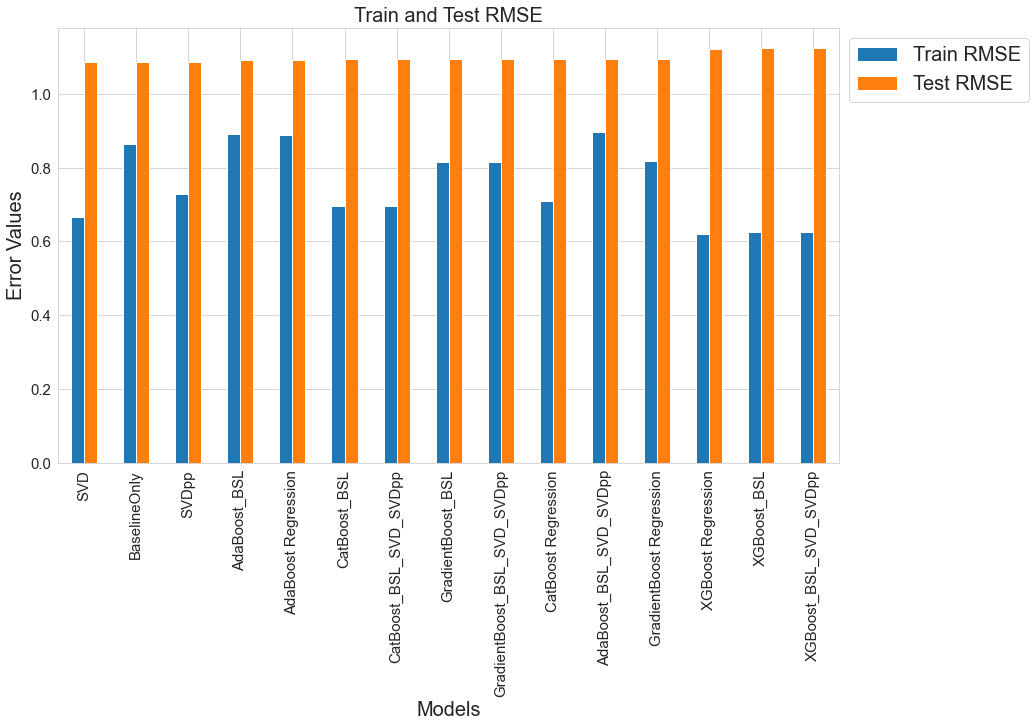

In [69]:
error_table_rmse.plot(x = "Model", kind = "bar", figsize = (14, 8), grid = True, fontsize = 15)
plt.title("Train and Test RMSE", fontsize = 20)
plt.ylabel("Error Values", fontsize = 20)
plt.xlabel("Models", fontsize = 20)
plt.legend(bbox_to_anchor=(1, 1), fontsize = 20)
plt.show()

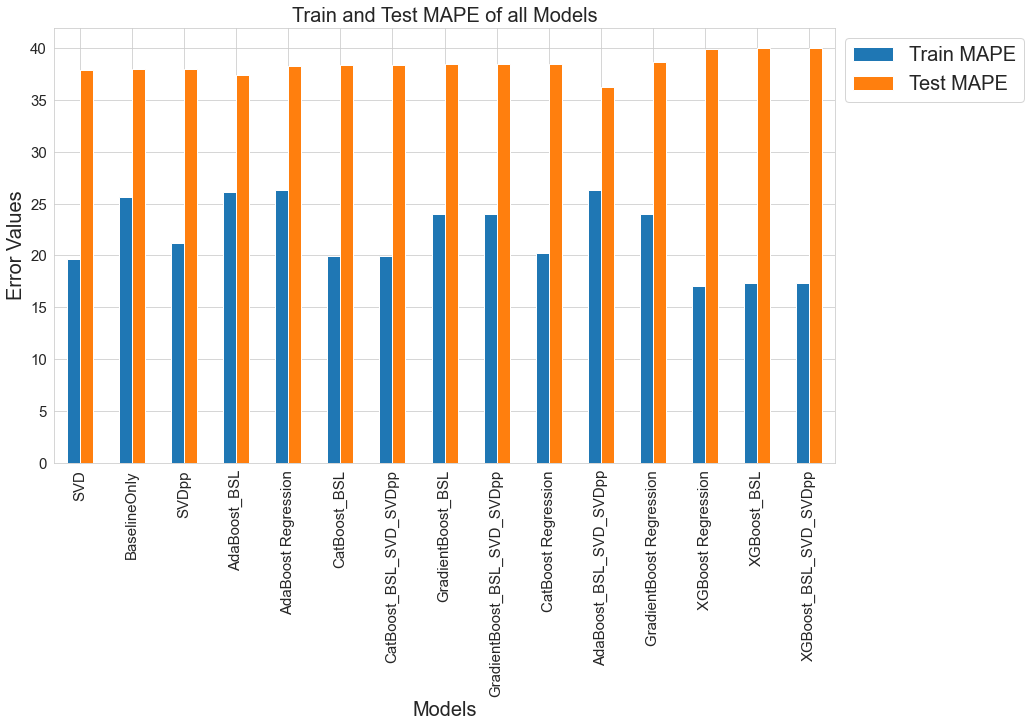

In [70]:
error_table_mape.plot(x = "Model", kind = "bar", figsize = (14, 8), grid = True, fontsize = 15)
plt.title("Train and Test MAPE of all Models", fontsize = 20)
plt.ylabel("Error Values", fontsize = 20)
plt.xlabel("Models", fontsize = 20)
plt.legend(bbox_to_anchor=(1, 1), fontsize = 20)
plt.show()

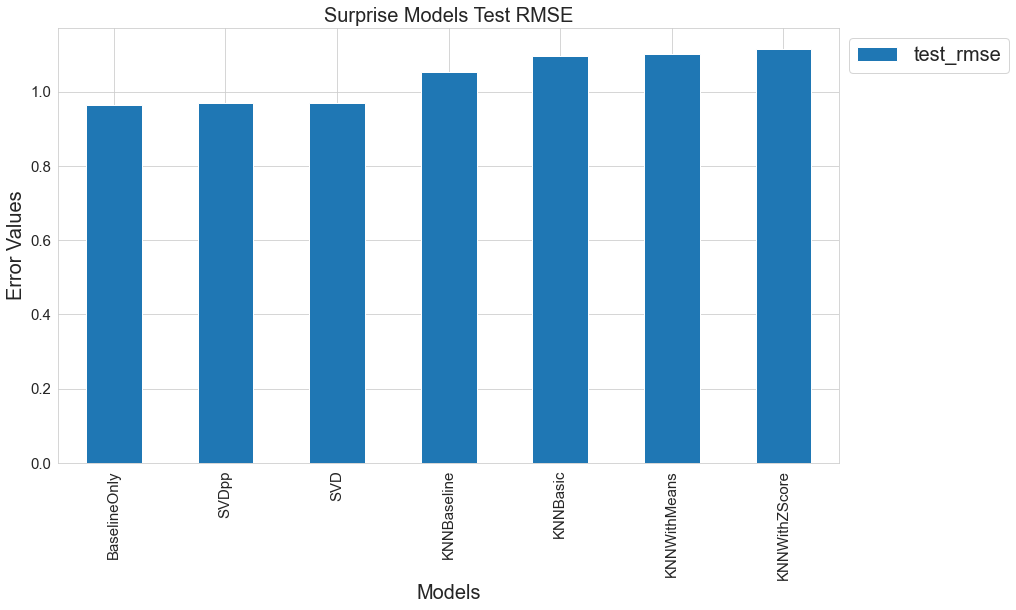

In [71]:
surprise_rmse = surprise_results[['Algorithm', 'test_rmse']]
surprise_rmse.plot(x = "Algorithm", kind = "bar", figsize = (14, 8), grid = True, fontsize = 15)
plt.title("Surprise Models Test RMSE", fontsize = 20)
plt.ylabel("Error Values", fontsize = 20)
plt.xlabel("Models", fontsize = 20)
plt.legend(bbox_to_anchor=(1, 1), fontsize = 20)
plt.show()

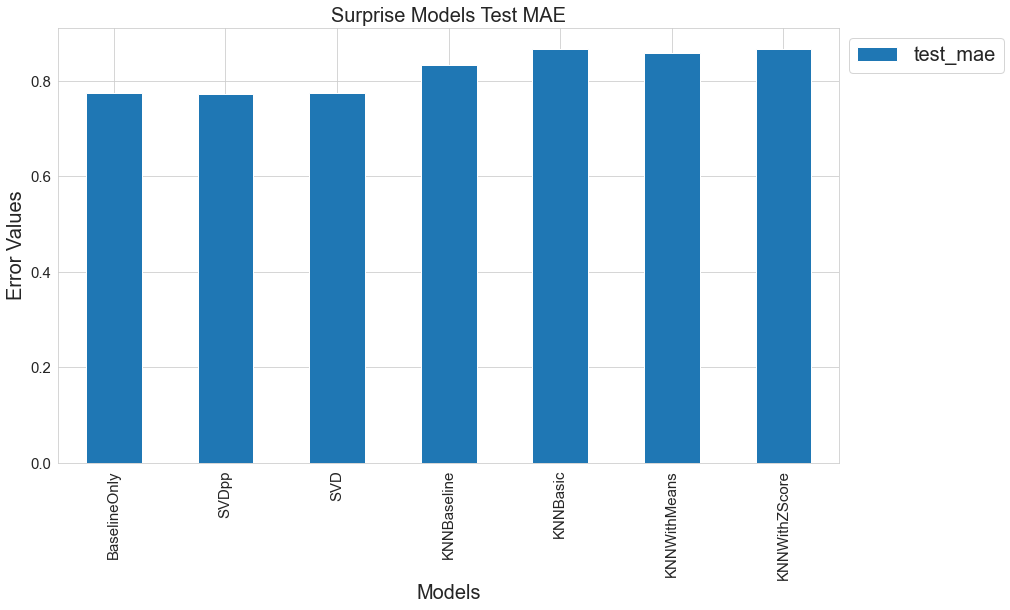

In [72]:
surprise_mae = surprise_results[['Algorithm', 'test_mae']]
surprise_mae.plot(x = "Algorithm", kind = "bar", figsize = (14, 8), grid = True, fontsize = 15)
plt.title("Surprise Models Test MAE", fontsize = 20)
plt.ylabel("Error Values", fontsize = 20)
plt.xlabel("Models", fontsize = 20)
plt.legend(bbox_to_anchor=(1, 1), fontsize = 20)
plt.show()

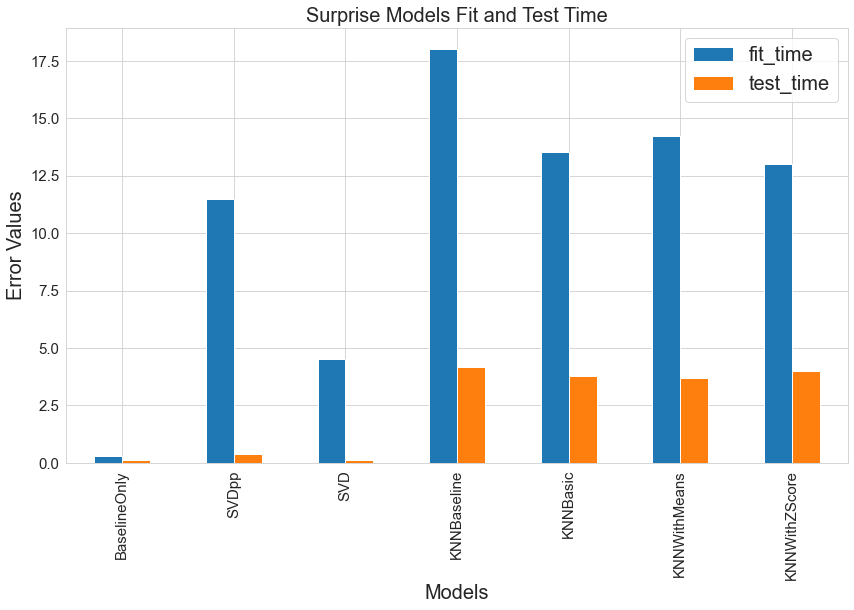

In [73]:
surprise_time = surprise_results[['Algorithm', 'fit_time', 'test_time']]
surprise_time.plot(x = "Algorithm", kind = "bar", figsize = (14, 8), grid = True, fontsize = 15)
plt.title("Surprise Models Fit and Test Time", fontsize = 20)
plt.ylabel("Error Values", fontsize = 20)
plt.xlabel("Models", fontsize = 20)
plt.legend(bbox_to_anchor=(1, 1), fontsize = 20)
plt.show()

In [75]:
error_table

,Model,Train RMSE,Train MAPE,Test RMSE,Test MAPE
9,SVD,0.665271,19.686867,1.085872,37.929986
4,BaselineOnly,0.863752,25.654273,1.087066,37.959502
10,SVDpp,0.728083,21.234314,1.087374,37.962991
8,AdaBoost_BSL,0.890136,26.133138,1.090808,37.377982
3,AdaBoost Regression,0.887791,26.291669,1.092075,38.332109
6,CatBoost_BSL,0.695851,19.911156,1.093812,38.400041
12,CatBoost_BSL_SVD_SVDpp,0.695851,19.911156,1.093812,38.400041
7,GradientBoost_BSL,0.816588,23.982701,1.093965,38.502768
13,GradientBoost_BSL_SVD_SVDpp,0.816588,23.982701,1.093965,38.502768
1,CatBoost Regression,0.708150,20.239355,1.094041,38.501149


In [76]:
surprise_results

,Algorithm,test_rmse,test_mae,fit_time,test_time
0,BaselineOnly,0.963734,0.775090,0.308218,0.128919
1,SVDpp,0.968410,0.772491,11.473823,0.364891
2,SVD,0.970163,0.775841,4.498742,0.121870
3,KNNBaseline,1.052770,0.833388,18.031848,4.155087
4,KNNBasic,1.094865,0.866559,13.535003,3.764555
5,KNNWithMeans,1.101009,0.858281,14.224500,3.706781
6,KNNWithZScore,1.115780,0.867953,12.997724,4.002331


## 7.0 BaseLine Model Fitting (Champion Model)

In [39]:
print('Using Baseline SGD')
reader = Reader()
data = Dataset.load_from_df(df[['CustID', 'MovieID', 'Ratings']], reader)
bsl_options = {'method': 'sgd',
               'learning_rate': .00005,
               }
bsl = BaselineOnly(bsl_options=bsl_options)
cross_validate(bsl, data, measures=['RMSE', 'MAE'])
trainset = data.build_full_trainset()
bsl.fit(trainset)

Using Baseline SGD
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...


In [40]:
def baseline_movieprediction(user_id):
    user = df_titles.copy()
    user = user.reset_index()
    user['Estimate_Score'] = user['MovieID'].apply(lambda x: bsl.predict(user_id, x).est)
    user = user.drop('MovieID', axis = 1)
    user = user.sort_values('Estimate_Score', ascending=False)
    return user.head(20)

In [41]:
## Previous Movies which user has rated
df_807827 = df[(df['CustID'] == 807827) & (df['Ratings'] == 3)]
df_807827 = df_807827.set_index('MovieID')
#df_785314 = df_785314.join(df_titles)['Name']
df_807827

,CustID,Ratings,Date,Movie_Name
MovieID,,,,
16901,807827,3,2002-10-24,Days of Thunder
14050,807827,3,2002-10-24,Willy Wonka & the Chocolate Factory
15764,807827,3,2004-01-01,Legally Blonde 2: Red
6339,807827,3,2004-03-31,Desperado / El Mariachi
6859,807827,3,2004-06-01,Cheaper by the Dozen
...,...,...,...,...
6552,807827,3,2003-01-23,Charlie's Angels
6720,807827,3,2003-07-23,Black Hawk Down
13763,807827,3,2004-03-02,Jerry Maguire


In [42]:
baseline_movieprediction(807827)

,index,Movie_Year,Movie_Name,Estimate_Score
14960,14960,2003.0,Lord of the Rings: The Return of the King: Ext...,4.628042
7229,7229,2001.0,The Lord of the Rings: The Fellowship of the R...,4.622716
7056,7056,2002.0,Lord of the Rings: The Two Towers: Extended Ed...,4.606692
5102,5102,1993.0,The Simpsons: Season 5,4.477223
14549,14549,1994.0,The Shawshank Redemption: Special Edition,4.476655
5581,5581,1980.0,Star Wars: Episode V: The Empire Strikes Back,4.475946
14239,14239,2003.0,Lord of the Rings: The Return of the King,4.463909
16586,16586,1992.0,The Simpsons: Season 4,4.462981
16264,16264,1977.0,Star Wars: Episode IV: A New Hope,4.437325
15295,15295,2001.0,Band of Brothers,4.434490


## 8.0 Summary of Various Recommender System 

#### 8.1 Recommender Model Using Hybrid Collaborative Filtering

Name of the movie -------> Top Gun
Number of ratings by users for movie Top Gun is 62995
Number of similar movies to Top Gun is 1135


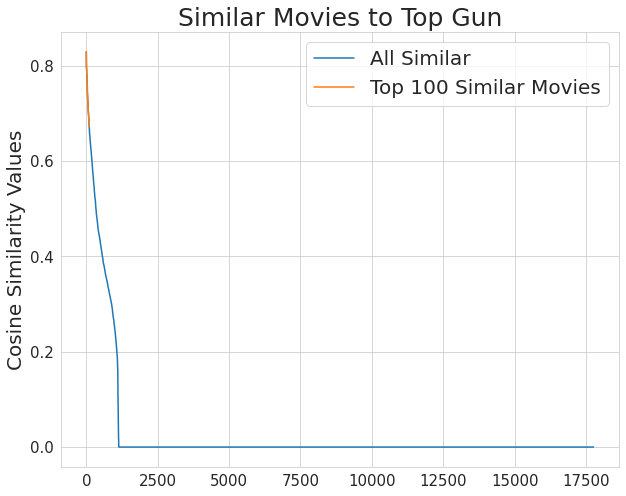

,Year_of_Release,Movie_Title
MovieID,,
15124,1996.0,Independence Day
6287,1990.0,Pretty Woman
15107,2001.0,Ocean's Eleven
13728,2000.0,Gladiator
16879,1997.0,Titanic
6972,1998.0,Armageddon
16668,1992.0,A Few Good Men
6037,2002.0,The Bourne Identity
14410,2002.0,Spider-Man


In [43]:
## Input: Movie Name  
## Output: Top 10 movies
Simlarity_Movie_Recommedation('Top Gun')

#### 8.2 Recommender Model Using corrwith() method

In [44]:
## Input: Movie Name  
## Output: Top 10 movies
corrwith_movie_recommedation('Top Gun')

,Correlation,Ratings,Number of ratings
Movie_Name,,,
Top Gun,1.000000,3.779666,63254
Cocktail,0.476944,3.184822,40098
Days of Thunder,0.461505,3.200108,31518
Pretty Woman,0.423554,3.753731,63528
The Karate Kid Part II,0.413621,3.338864,8378
A Few Good Men,0.410995,3.973404,54820
Dirty Dancing,0.385357,3.534456,55099
Armageddon,0.379572,3.513950,59033
The Firm,0.376329,3.615574,43881


#### 8.3 Recommender Model Using Baseline only

In [45]:
## Input: User ID Name  
## Output: Top 10 movies which we would like to watch 
baseline_movieprediction(807827)

,index,Movie_Year,Movie_Name,Estimate_Score
14960,14960,2003.0,Lord of the Rings: The Return of the King: Ext...,4.628042
7229,7229,2001.0,The Lord of the Rings: The Fellowship of the R...,4.622716
7056,7056,2002.0,Lord of the Rings: The Two Towers: Extended Ed...,4.606692
5102,5102,1993.0,The Simpsons: Season 5,4.477223
14549,14549,1994.0,The Shawshank Redemption: Special Edition,4.476655
5581,5581,1980.0,Star Wars: Episode V: The Empire Strikes Back,4.475946
14239,14239,2003.0,Lord of the Rings: The Return of the King,4.463909
16586,16586,1992.0,The Simpsons: Season 4,4.462981
16264,16264,1977.0,Star Wars: Episode IV: A New Hope,4.437325
15295,15295,2001.0,Band of Brothers,4.434490


In [51]:
## USer Number 807827 Previous Ratings for Movies which user has rated
df_807827 = df[(df['CustID'] == 807827) & (df['Ratings'] == 3)]
df_807827 = df_807827.set_index('MovieID')
df_807827.head(20)

,CustID,Ratings,Date,Movie_Name
MovieID,,,,
16901,807827,3,2002-10-24,Days of Thunder
14050,807827,3,2002-10-24,Willy Wonka & the Chocolate Factory
15764,807827,3,2004-01-01,Legally Blonde 2: Red
6339,807827,3,2004-03-31,Desperado / El Mariachi
6859,807827,3,2004-06-01,Cheaper by the Dozen
16948,807827,3,2005-04-21,Bridget Jones: The Edge of Reason
16201,807827,3,2002-11-20,Waiting for Guffman
15385,807827,3,2002-10-24,Amistad
15715,807827,3,2005-06-24,Real Women Have Curves
